<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_650-700.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [814]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [815]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

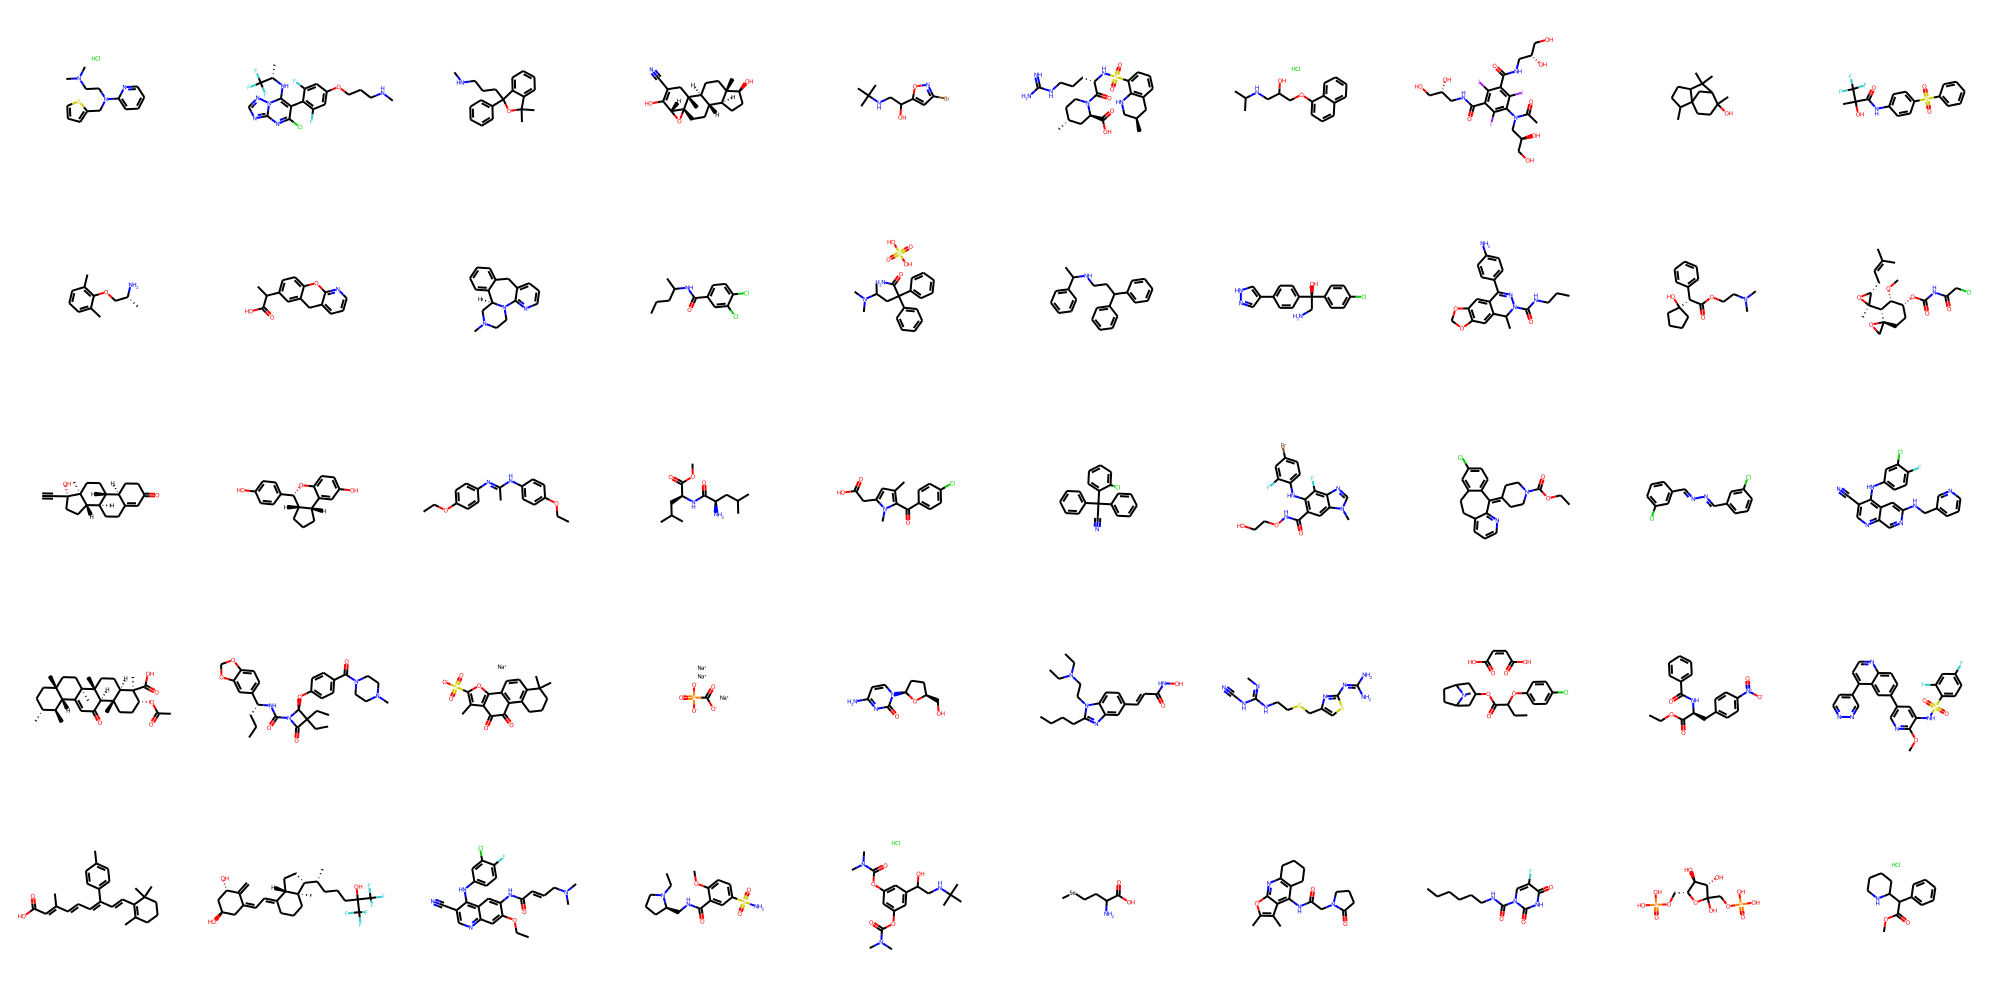

In [816]:
smiles_list = [
'CN(C)CCN(Cc1cccs1)c1ccccn1.Cl',
'CNCCCOc1cc(F)c(-c2c(Cl)nc3ncnn3c2N[C@@H](C)C(F)(F)F)c(F)c1',
'CNCCCC1(c2ccccc2)OC(C)(C)c2ccccc21',
'C[C@]12CC[C@H]3[C@@H](CC[C@@]45O[C@@H]4C(O)=C(C#N)C[C@]35C)[C@@H]1CC[C@@H]2O',
'CC(C)(C)NCC(O)c1cc(Br)no1',
'C[C@H]1CNc2c(cccc2S(=O)(=O)N[C@@H](CCCNC(=N)N)C(=O)N2CC[C@@H](C)C[C@@H]2C(=O)O)C1',
'CC(C)NCC(O)COc1cccc2ccccc12.Cl',
'CC(=O)N(C[C@@H](O)CO)c1c(I)c(C(=O)NC[C@@H](O)CO)c(I)c(C(=O)NC[C@@H](O)CO)c1I',
'CC1CCC2C(C)(C)C3CC12CCC3(C)O',
'CC(O)(C(=O)Nc1ccc(S(=O)(=O)c2ccccc2)cc1)C(F)(F)F',
'Cc1cccc(C)c1OC[C@@H](C)N',
'CC(C(=O)O)c1ccc2c(c1)Cc1cccnc1O2',
'CN1CCN2c3ncccc3Cc3ccccc3[C@@H]2C1',
'CCCC(C)NC(=O)c1ccc(Cl)c(Cl)c1',
'CC(CC(C(N)=O)(c1ccccc1)c1ccccc1)N(C)C.O=S(=O)(O)O',
'CC(NCCC(c1ccccc1)c1ccccc1)c1ccccc1',
'NC[C@@](O)(c1ccc(Cl)cc1)c1ccc(-c2cn[nH]c2)cc1',
'CCCNC(=O)N1N=C(c2ccc(N)cc2)c2cc3c(cc2C1C)OCO3',
'CN(C)CCOC(=O)[C@@H](c1ccccc1)C1(O)CCCC1',
'CO[C@@H]1[C@H](OC(=O)NC(=O)CCl)CC[C@]2(CO2)[C@@H]1[C@@]1(C)O[C@@H]1CC=C(C)C',
'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3CC[C@@]21C',
'Oc1ccc([C@@H]2Oc3ccc(O)cc3[C@@H]3CCC[C@@H]32)cc1',
'CCOc1ccc(/N=C(\C)Nc2ccc(OCC)cc2)cc1',
'COC(=O)[C@H](CC(C)C)NC(=O)[C@H](N)CC(C)C',
'Cc1cc(CC(=O)O)n(C)c1C(=O)c1ccc(Cl)cc1',
'N#CC(c1ccccc1)(c1ccccc1)c1ccccc1Cl',
'Cn1cnc2c(F)c(Nc3ccc(Br)cc3F)c(C(=O)NOCCO)cc21',
'CCOC(=O)N1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1',
'Clc1cccc(/C=N/N=C/c2cccc(Cl)c2)c1',
'N#Cc1cnc2cnc(NCc3cccnc3)cc2c1Nc1ccc(F)c(Cl)c1',
'CC(=O)O[C@@H]1CC[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H]2C(=O)C=C2[C@@H]4[C@@H](C)[C@H](C)CC[C@]4(C)CC[C@]23C)[C@@]1(C)C(=O)O',
'CCC[C@@H](NC(=O)N1C(=O)C(CC)(CC)[C@@H]1Oc1ccc(C(=O)N2CCN(C)CC2)cc1)c1ccc2c(c1)OCO2',
'Cc1c(S(=O)(=O)[O-])oc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C.[Na+]',
'O=C([O-])P(=O)([O-])[O-].[Na+].[Na+].[Na+]',
'Nc1ccn([C@H]2CC[C@@H](CO)O2)c(=O)n1',
'CCCCc1nc2cc(/C=C/C(=O)NO)ccc2n1CCN(CC)CC',
'C/N=C(NC#N)NCCSCc1csc(N=C(N)N)n1',
'CCC(Oc1ccc(Cl)cc1)C(=O)OC1CC2CCC(C1)N2C.O=C(O)/C=C\C(=O)O',
'CCOC(=O)[C@H](Cc1ccc([N+](=O)[O-])cc1)NC(=O)c1ccccc1',
'COc1ncc(-c2ccc3nccc(-c4ccnnc4)c3c2)cc1NS(=O)(=O)c1ccc(F)cc1F',
'CC1=C(/C=C/C(=C/C=C/C(C)=C/C(=O)O)c2ccc(C)cc2)C(C)(C)CCC1',
'C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H](C)CCCC(O)(C(F)(F)F)C(F)(F)F)C[C@@H](O)C[C@@H]1O',
'CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C',
'CCN1CCC[C@@H]1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC',
'CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1.Cl',
'C[Se]CCC(N)C(=O)O',
'Cc1oc2nc3c(c(NC(=O)CN4CCCC4=O)c2c1C)CCCC3',
'CCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O',
'O=P(O)(O)OC[C@H]1OC(O)(COP(=O)(O)O)[C@@H](O)[C@@H]1O',
'COC(=O)C(c1ccccc1)C1CCCCN1.Cl',

               

]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



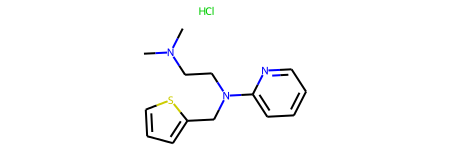

In [817]:
M1 = mol_list [0]
M1

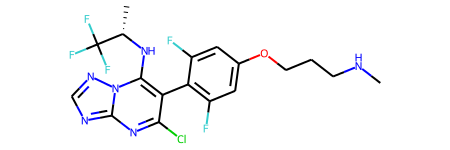

In [818]:
M2 = mol_list [1]
M2

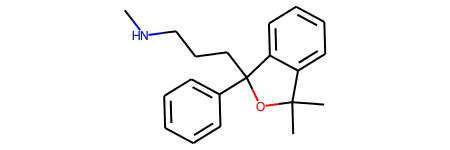

In [819]:
M3 = mol_list [2]
M3

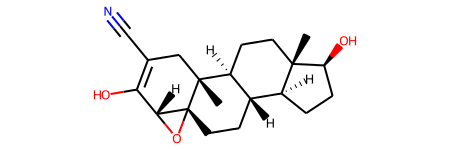

In [820]:
M4 = mol_list [3]
M4

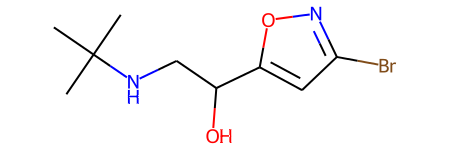

In [821]:
M5 = mol_list [4]
M5

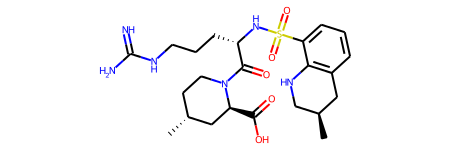

In [822]:
M6 = mol_list [5]
M6

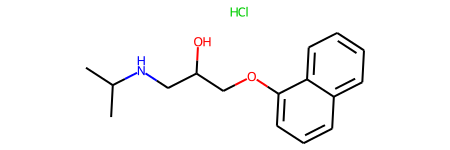

In [823]:
M7 = mol_list [6]
M7

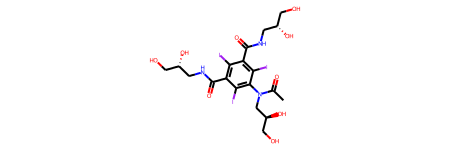

In [824]:
M8 = mol_list [7]
M8

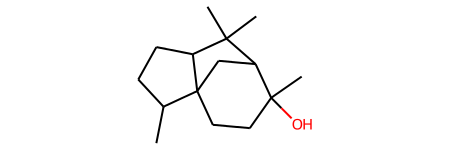

In [825]:
M9 = mol_list [8]
M9

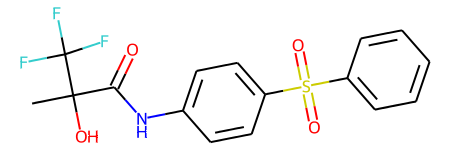

In [826]:
M10= mol_list [9]
M10

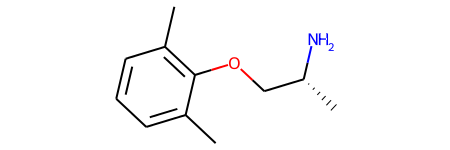

In [827]:
M11= mol_list [10]
M11

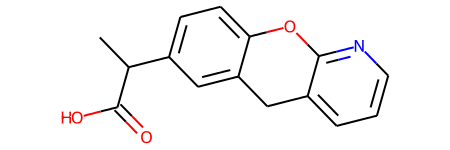

In [828]:
M12= mol_list [11]
M12

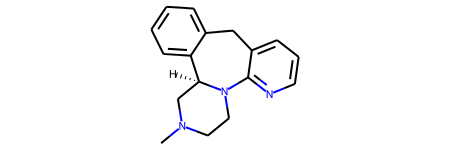

In [829]:
M13= mol_list [12]
M13

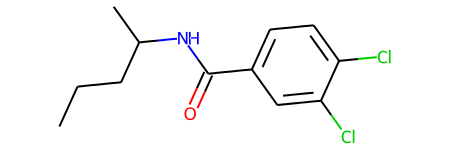

In [830]:
M14= mol_list [13]
M14

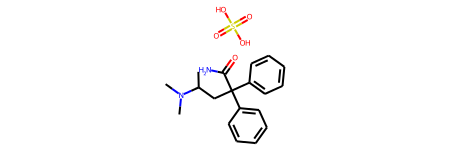

In [831]:
M15= mol_list [14]
M15

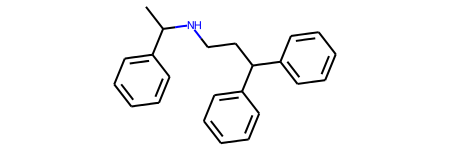

In [832]:
M16= mol_list [15]
M16

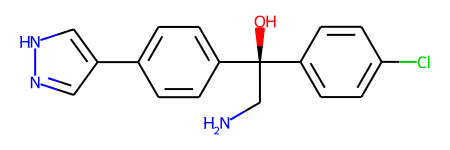

In [833]:
M17= mol_list [16]
M17

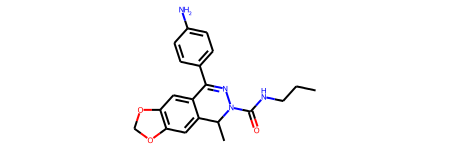

In [834]:
M18= mol_list [17]
M18

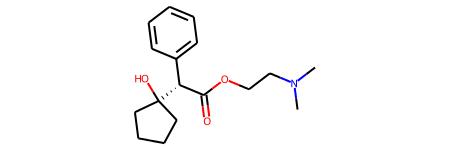

In [835]:
M19= mol_list [18]
M19

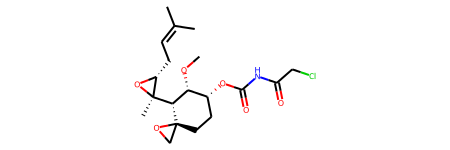

In [836]:
M20= mol_list [19]
M20

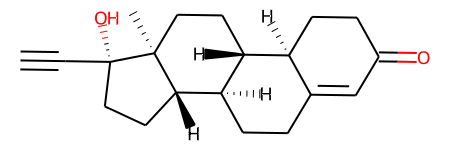

In [837]:
M21= mol_list [20]
M21

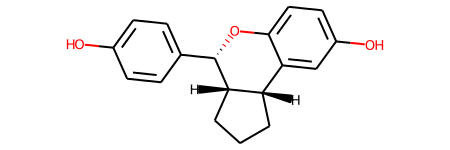

In [838]:
M22= mol_list [21]
M22

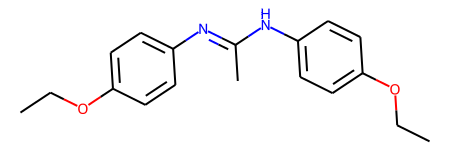

In [839]:
M23= mol_list [22]
M23

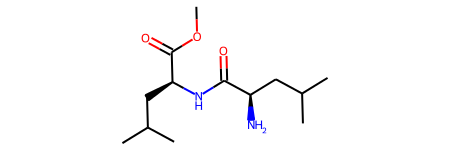

In [840]:
M24= mol_list [23]
M24

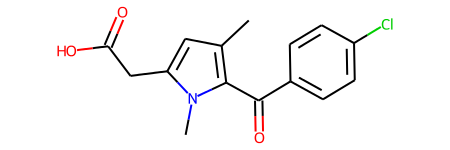

In [841]:
M25= mol_list [24]
M25

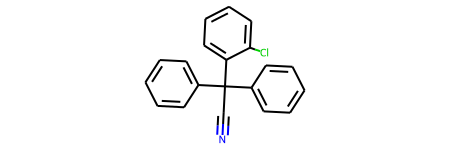

In [842]:
M26= mol_list [25]
M26

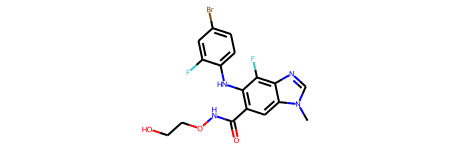

In [843]:
M27= mol_list [26]
M27

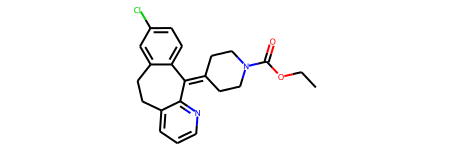

In [844]:
M28= mol_list [27]
M28

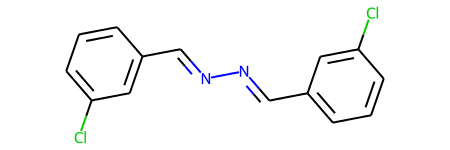

In [845]:
M29= mol_list [28]
M29

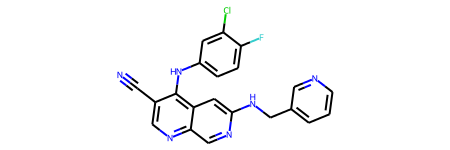

In [846]:
M30= mol_list [29]
M30

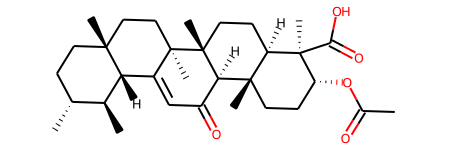

In [847]:
M31= mol_list [30]
M31

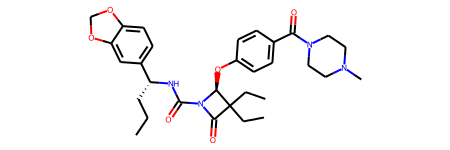

In [848]:
M32= mol_list [31]
M32

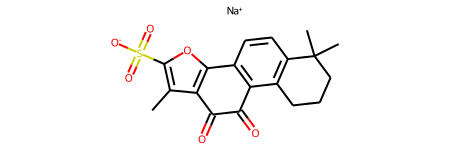

In [849]:
M33= mol_list [32]
M33

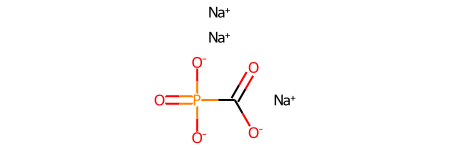

In [850]:
M34= mol_list [33]
M34

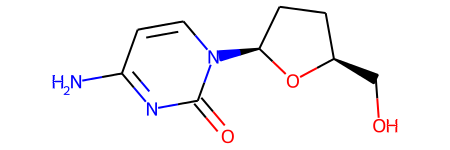

In [851]:
M35= mol_list [34]
M35

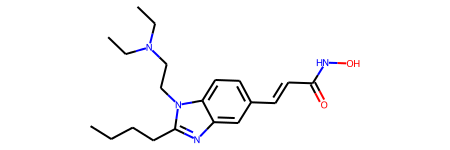

In [852]:
M36= mol_list [35]
M36

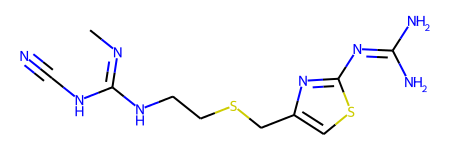

In [853]:
M37= mol_list [36]
M37

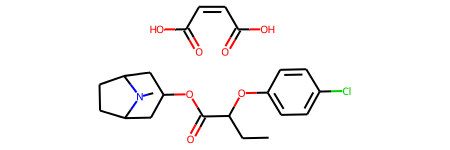

In [854]:
M38= mol_list [37]
M38


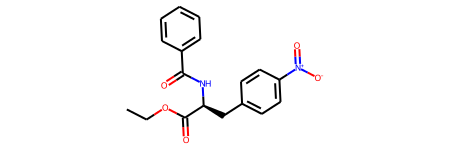

In [855]:
M39= mol_list [38]
M39

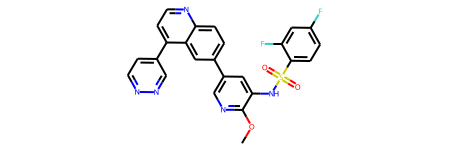

In [856]:
M40= mol_list [39]
M40

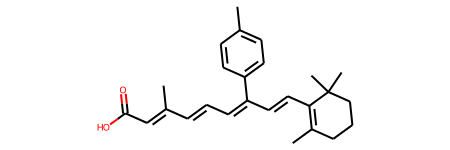

In [857]:
M41= mol_list [40]
M41

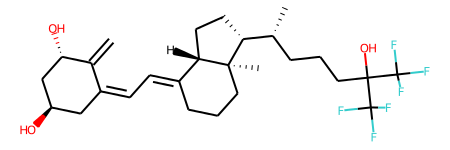

In [858]:
M42= mol_list [41]
M42

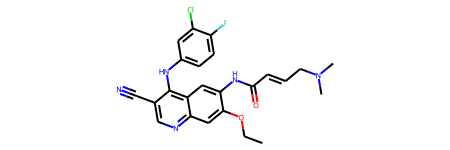

In [859]:
M43= mol_list [42]
M43

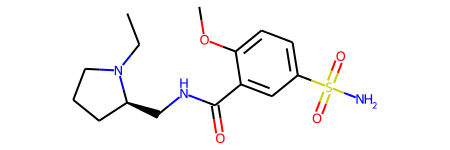

In [860]:
M44= mol_list [43]
M44

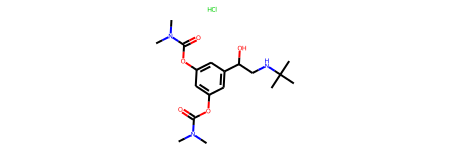

In [861]:
M45= mol_list [44]
M45

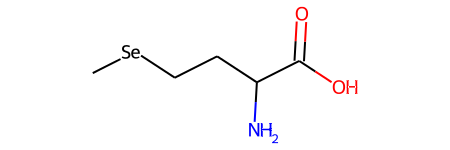

In [862]:
M46= mol_list [45]
M46

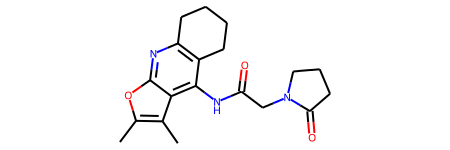

In [863]:
M47= mol_list [46]
M47

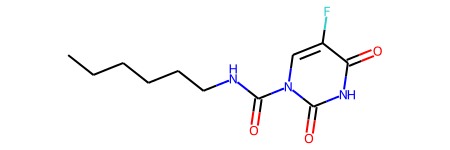

In [864]:
M48= mol_list [47]
M48

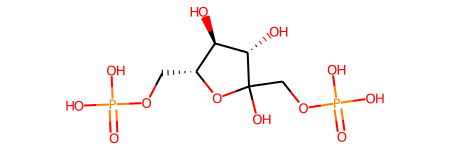

In [865]:
M49= mol_list [48]
M49

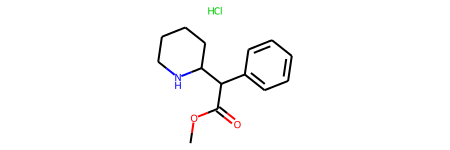

In [866]:
M50= mol_list [49]
M50

In [867]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[14,
 33,
 64,
 80,
 131,
 139,
 175,
 196,
 232,
 236,
 241,
 356,
 378,
 383,
 428,
 448,
 495,
 507,
 510,
 514,
 543,
 604,
 649,
 652,
 656,
 663,
 675,
 693,
 726,
 735,
 842,
 849,
 881,
 894,
 927,
 1007,
 1008]

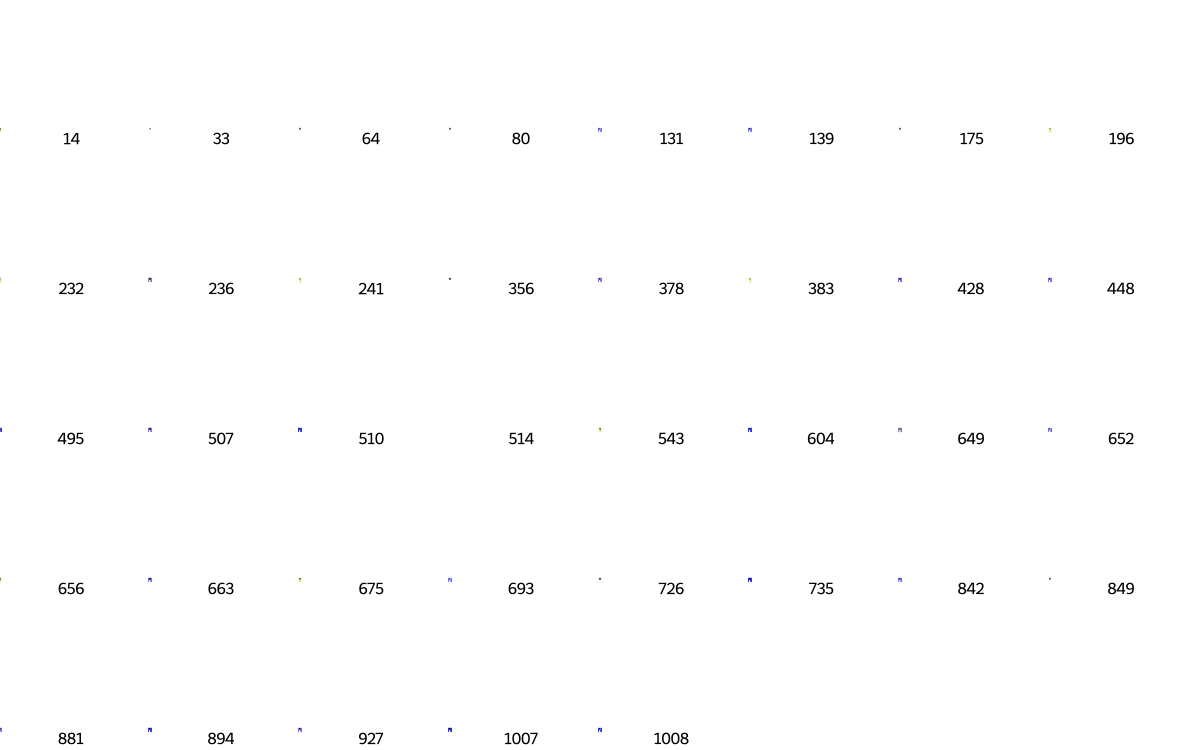

In [868]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [869]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 4,
 10,
 13,
 33,
 43,
 80,
 99,
 103,
 106,
 114,
 128,
 136,
 138,
 225,
 259,
 283,
 322,
 339,
 356,
 376,
 378,
 379,
 405,
 406,
 412,
 428,
 429,
 489,
 490,
 540,
 561,
 593,
 628,
 633,
 659,
 667,
 690,
 695,
 699,
 718,
 723,
 742,
 761,
 816,
 831,
 849,
 868,
 870,
 875,
 884,
 887,
 904,
 935,
 971,
 1014]

In [870]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 36,
 64,
 80,
 128,
 138,
 175,
 235,
 250,
 280,
 324,
 356,
 389,
 406,
 436,
 485,
 556,
 604,
 656,
 667,
 706,
 718,
 726,
 740,
 762,
 772,
 795,
 849,
 880,
 887,
 890,
 892,
 956,
 971]

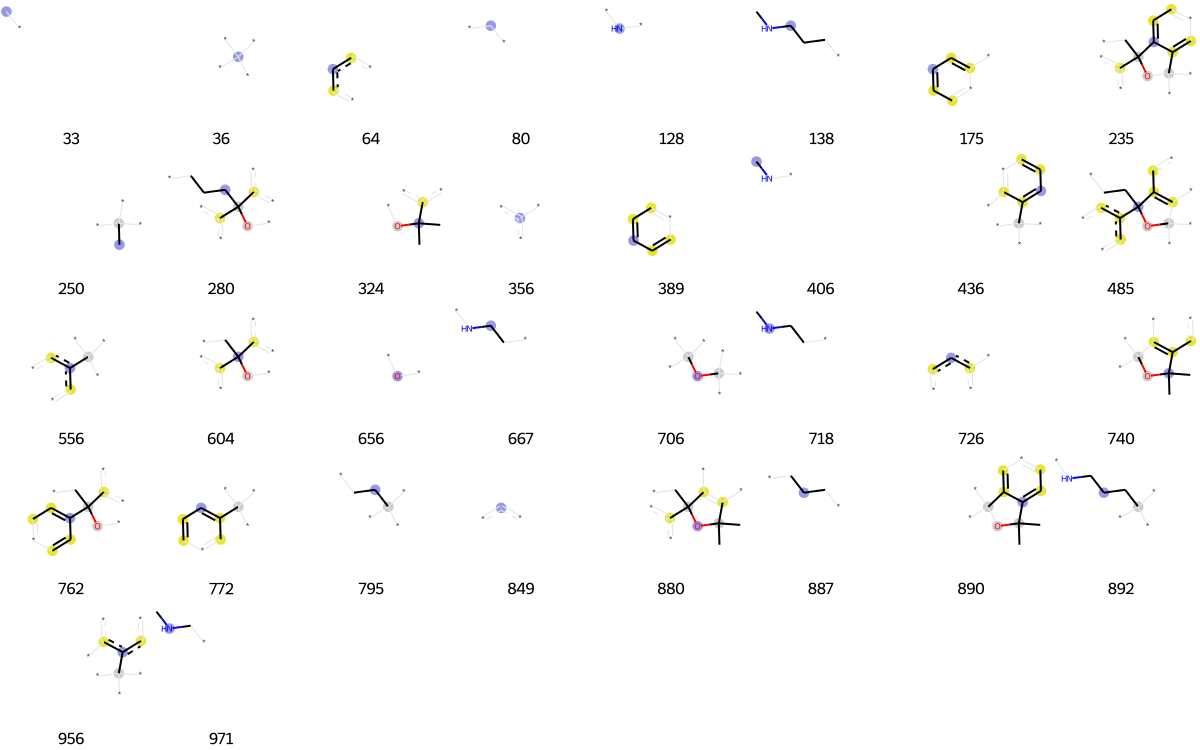

In [871]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [872]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 36,
 46,
 65,
 71,
 95,
 105,
 112,
 134,
 138,
 178,
 228,
 233,
 247,
 250,
 301,
 309,
 334,
 356,
 360,
 412,
 423,
 453,
 507,
 519,
 529,
 559,
 562,
 578,
 622,
 632,
 656,
 674,
 728,
 753,
 760,
 790,
 807,
 881,
 887,
 917,
 926,
 927,
 940,
 1000,
 1019]

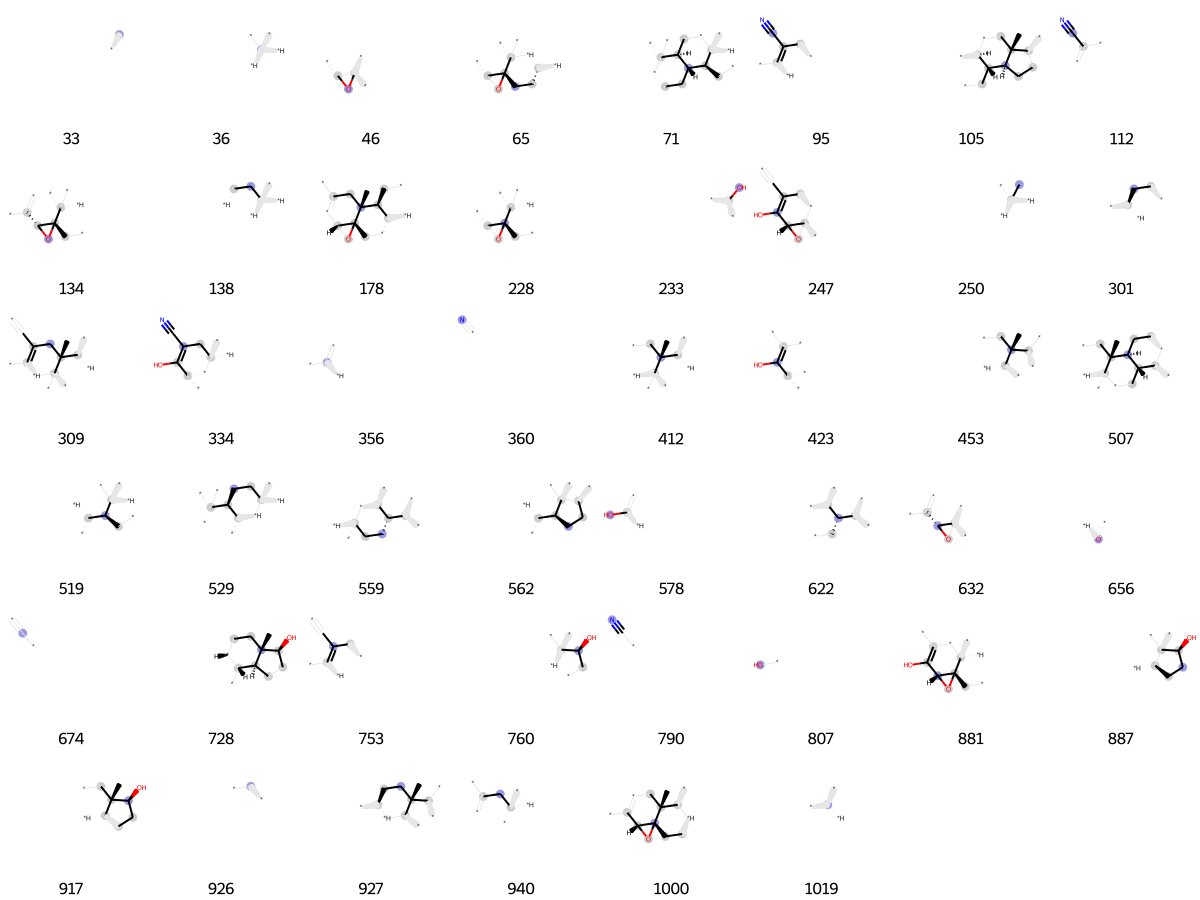

In [873]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [874]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 33,
 75,
 80,
 89,
 114,
 128,
 227,
 248,
 251,
 269,
 338,
 339,
 356,
 378,
 392,
 518,
 554,
 603,
 606,
 607,
 629,
 656,
 689,
 728,
 807,
 843,
 849,
 875,
 954,
 997]

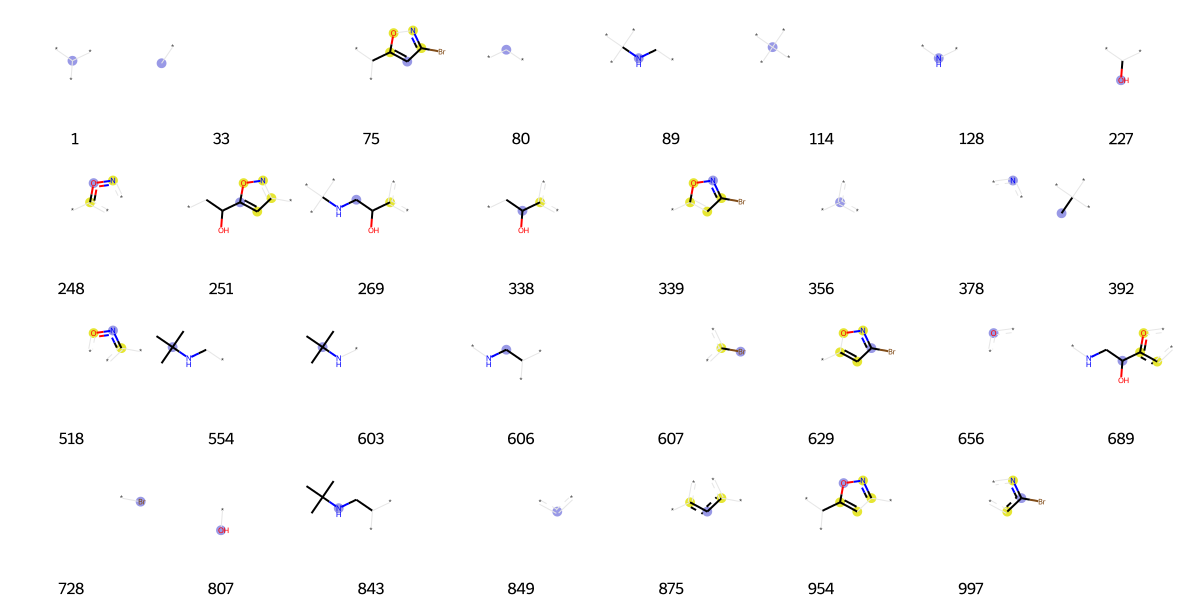

In [875]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [876]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 15,
 33,
 38,
 64,
 80,
 90,
 108,
 124,
 128,
 140,
 147,
 197,
 212,
 231,
 232,
 233,
 242,
 268,
 277,
 284,
 285,
 297,
 301,
 350,
 356,
 369,
 389,
 392,
 407,
 408,
 409,
 427,
 452,
 456,
 470,
 488,
 492,
 502,
 531,
 559,
 582,
 623,
 629,
 650,
 667,
 684,
 697,
 708,
 726,
 736,
 739,
 807,
 842,
 849,
 852,
 859,
 887,
 893,
 894,
 917,
 926,
 935,
 937,
 945,
 983,
 992,
 1019]

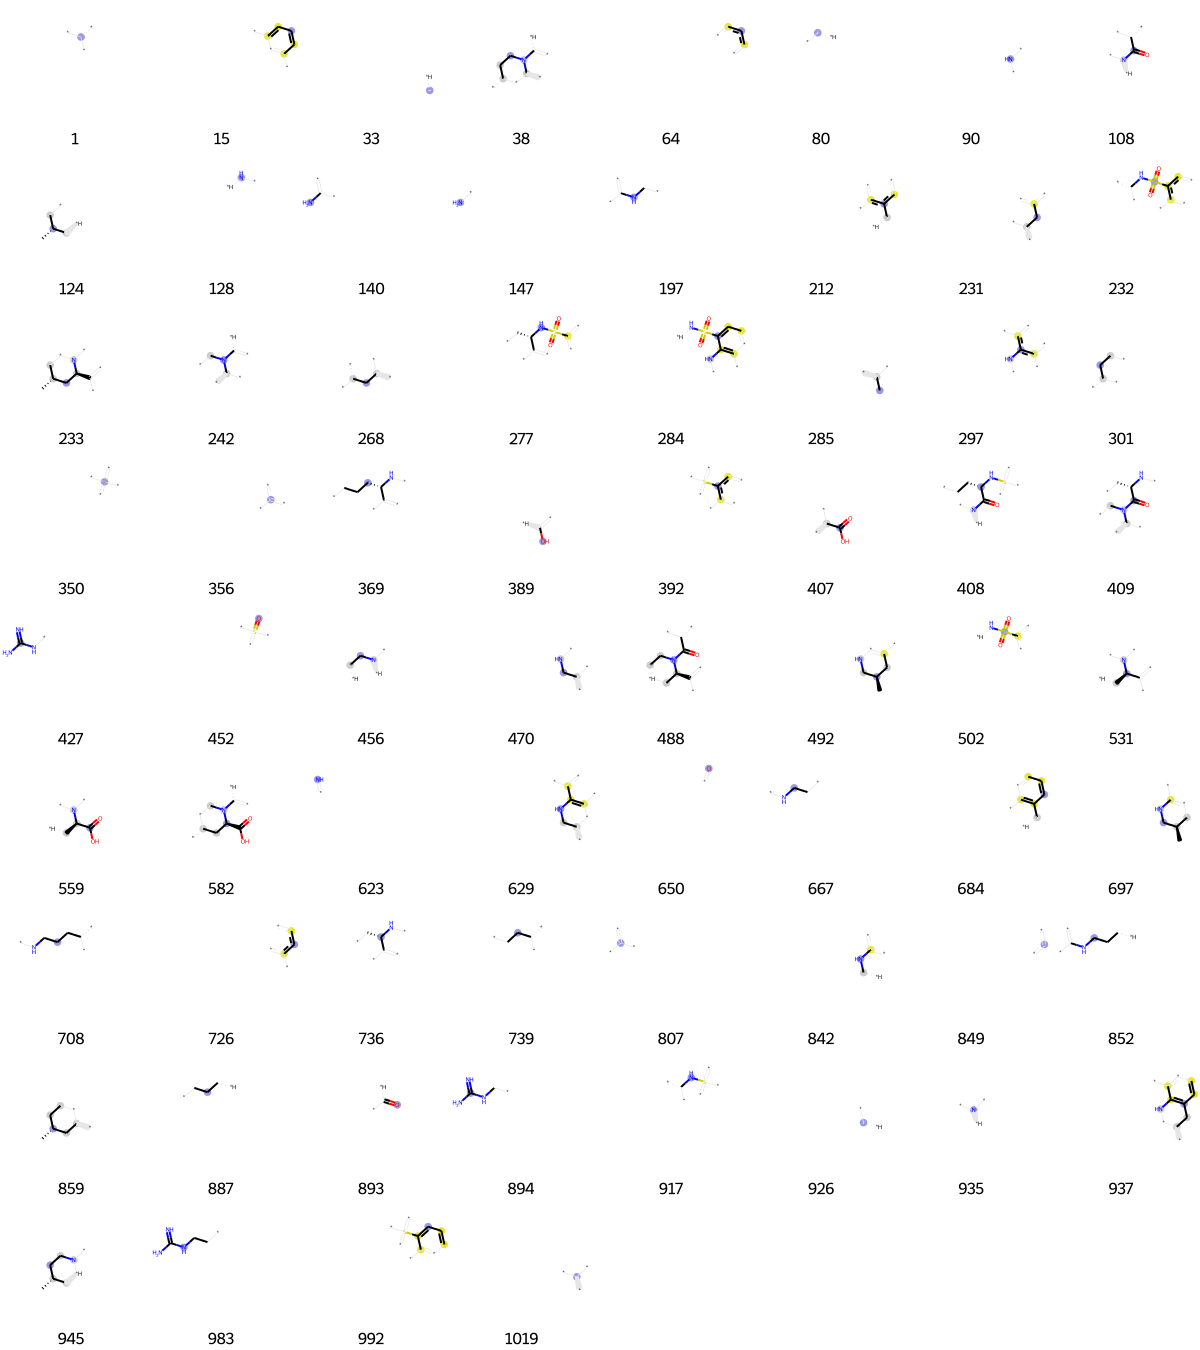

In [877]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [878]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 4,
 15,
 33,
 63,
 64,
 80,
 88,
 118,
 128,
 169,
 175,
 227,
 283,
 329,
 333,
 356,
 386,
 428,
 430,
 514,
 549,
 550,
 606,
 658,
 695,
 726,
 782,
 807,
 831,
 849,
 882,
 946,
 1006,
 1014]

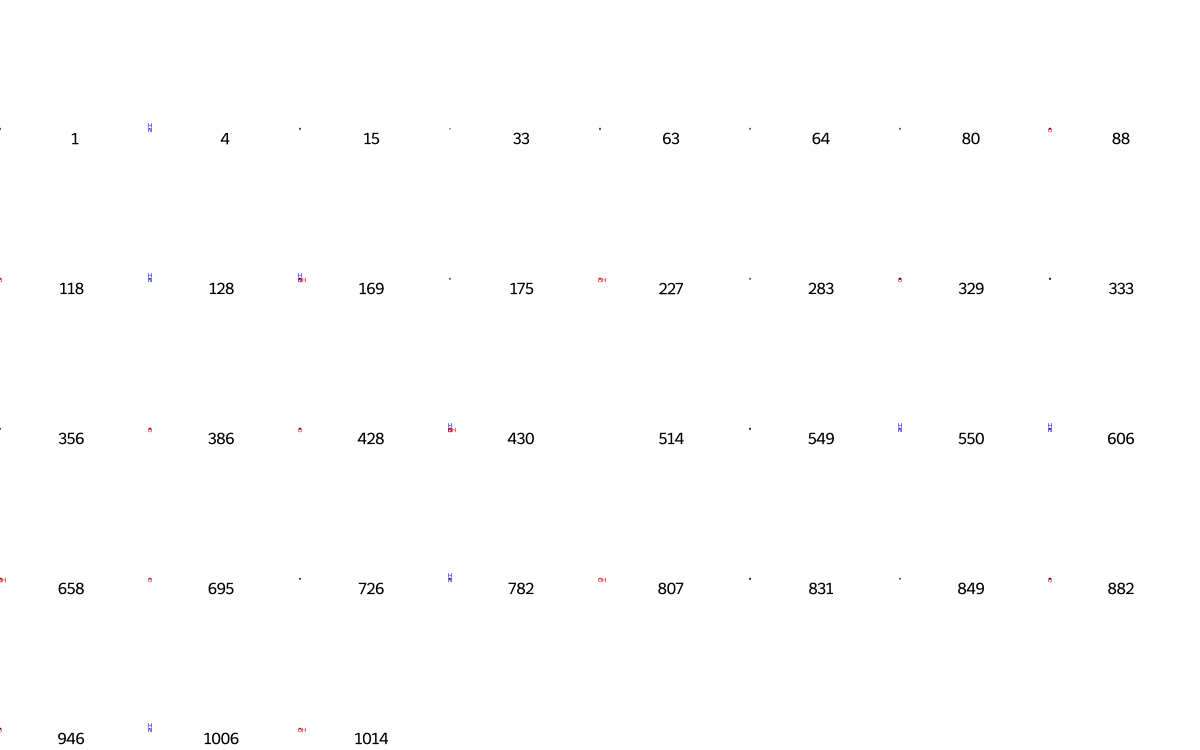

In [879]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [880]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 23,
 33,
 34,
 80,
 128,
 150,
 197,
 222,
 227,
 327,
 356,
 407,
 461,
 466,
 474,
 482,
 486,
 564,
 570,
 586,
 603,
 606,
 650,
 661,
 708,
 783,
 807,
 836,
 846,
 881,
 893,
 947,
 953,
 981,
 990,
 1014,
 1017]

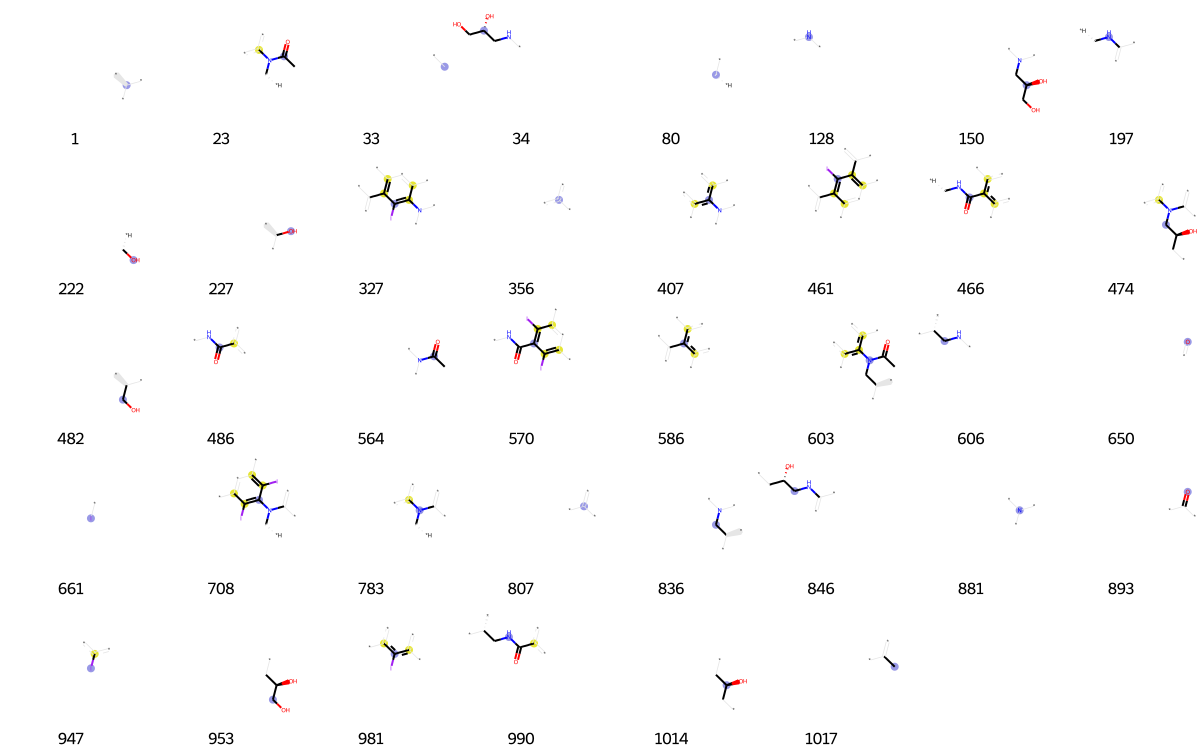

In [881]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [882]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 36,
 74,
 130,
 138,
 250,
 279,
 285,
 301,
 310,
 478,
 528,
 549,
 601,
 605,
 679,
 691,
 703,
 764,
 802,
 807,
 849,
 857,
 904,
 926,
 1002,
 1019]

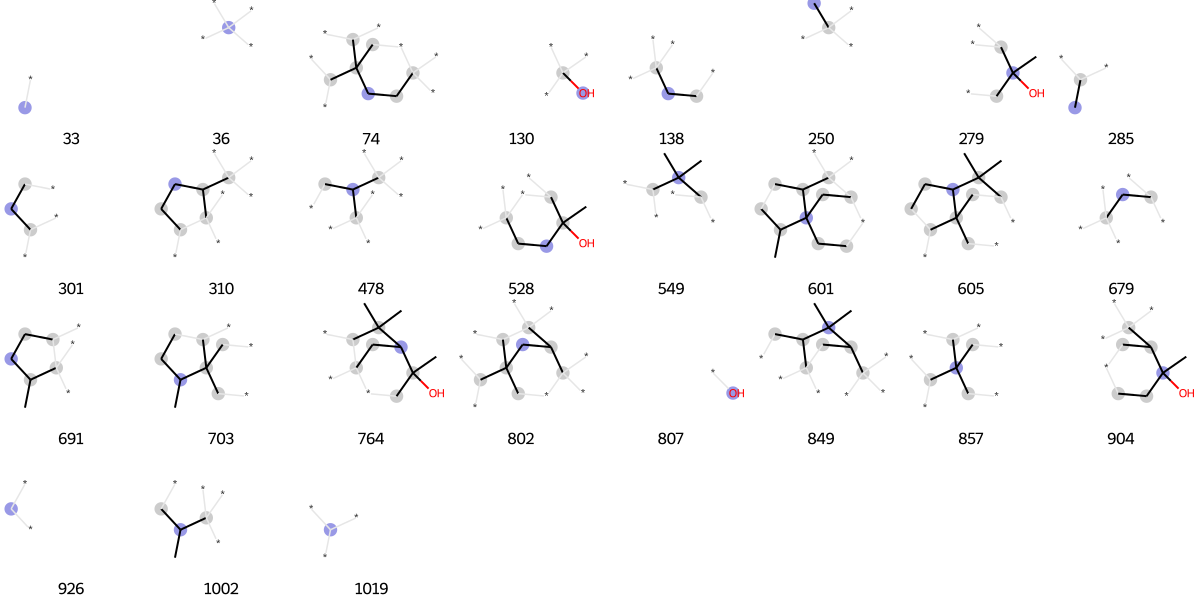

In [883]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [884]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 53,
 59,
 64,
 79,
 114,
 115,
 128,
 175,
 188,
 191,
 319,
 320,
 350,
 356,
 385,
 389,
 392,
 429,
 452,
 547,
 575,
 650,
 715,
 726,
 790,
 792,
 807,
 843,
 849,
 884,
 893,
 904,
 974,
 1008]

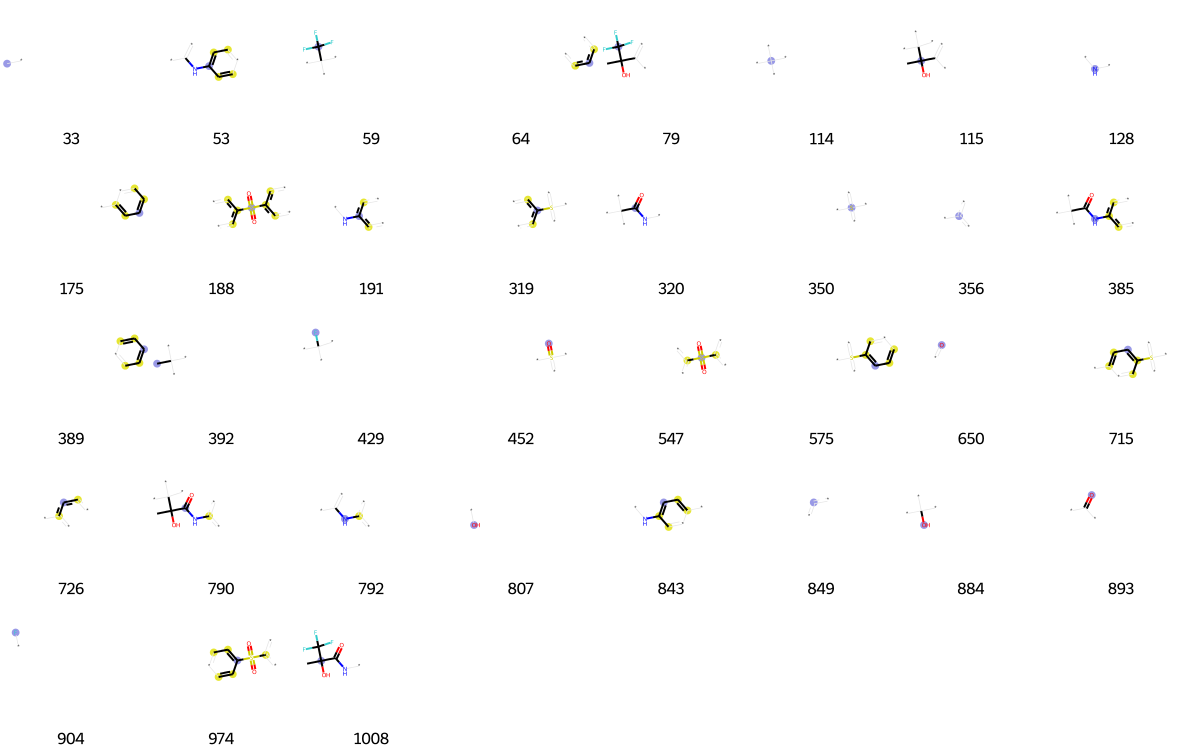

In [885]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [886]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 15,
 33,
 64,
 80,
 118,
 147,
 283,
 333,
 356,
 367,
 428,
 514,
 541,
 567,
 647,
 695,
 698,
 726,
 737,
 786,
 849,
 928,
 975]

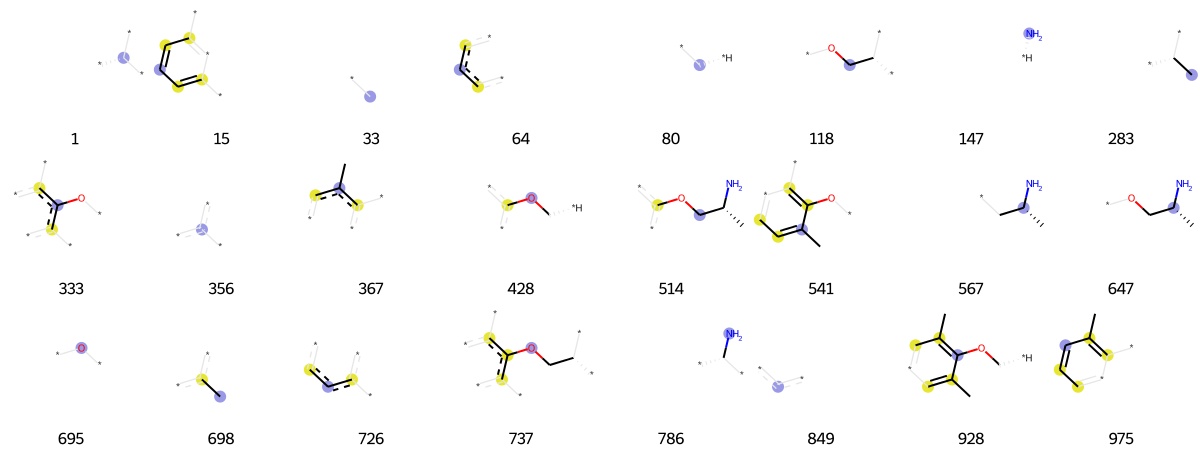

In [887]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [888]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 11,
 19,
 33,
 64,
 212,
 233,
 272,
 283,
 341,
 356,
 378,
 383,
 389,
 428,
 429,
 448,
 469,
 536,
 540,
 650,
 656,
 684,
 726,
 785,
 786,
 807,
 820,
 829,
 842,
 849,
 875,
 881,
 883,
 893,
 900,
 909,
 910,
 921,
 926,
 997]

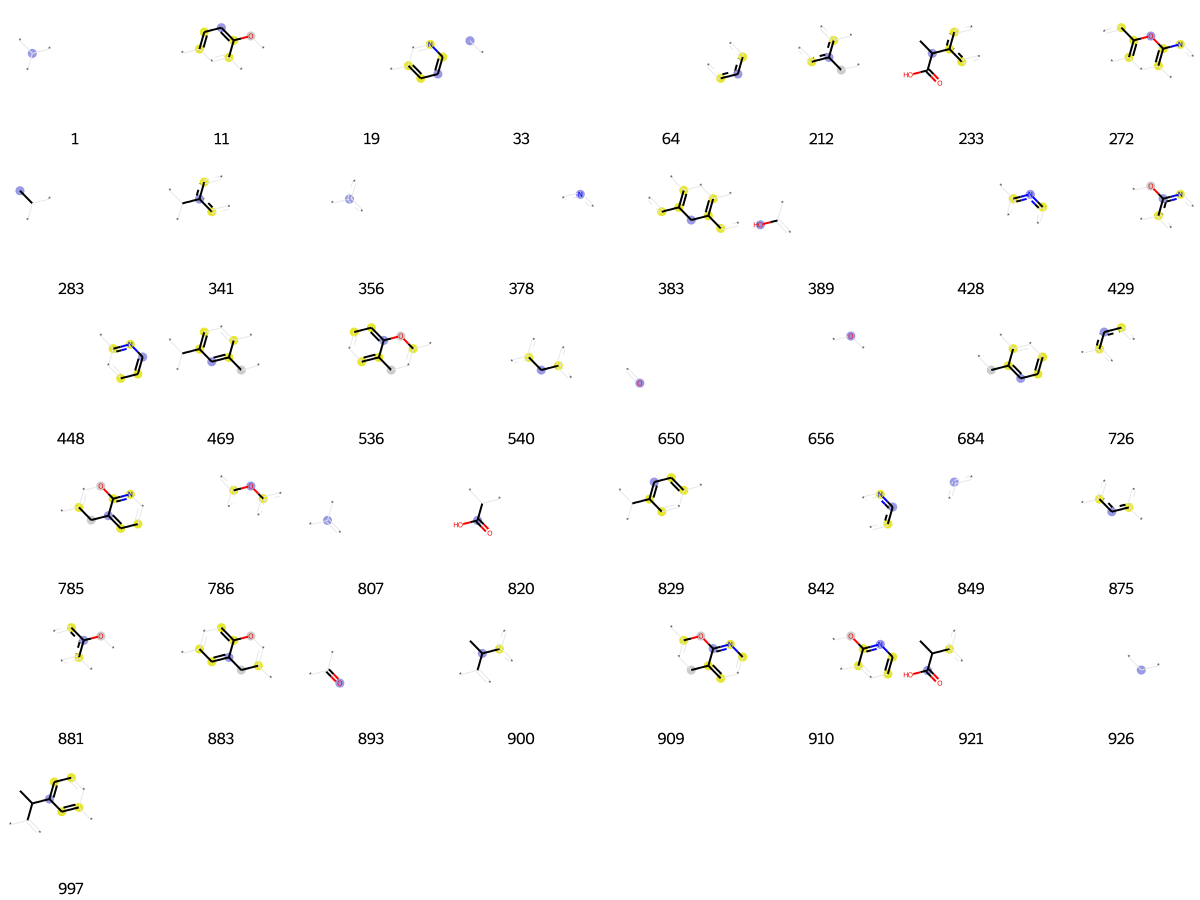

In [889]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [890]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[3,
 14,
 19,
 29,
 33,
 64,
 95,
 121,
 130,
 175,
 196,
 207,
 212,
 288,
 356,
 371,
 378,
 383,
 426,
 428,
 448,
 456,
 475,
 540,
 547,
 600,
 638,
 684,
 726,
 739,
 816,
 842,
 849,
 887,
 926,
 935,
 1019]

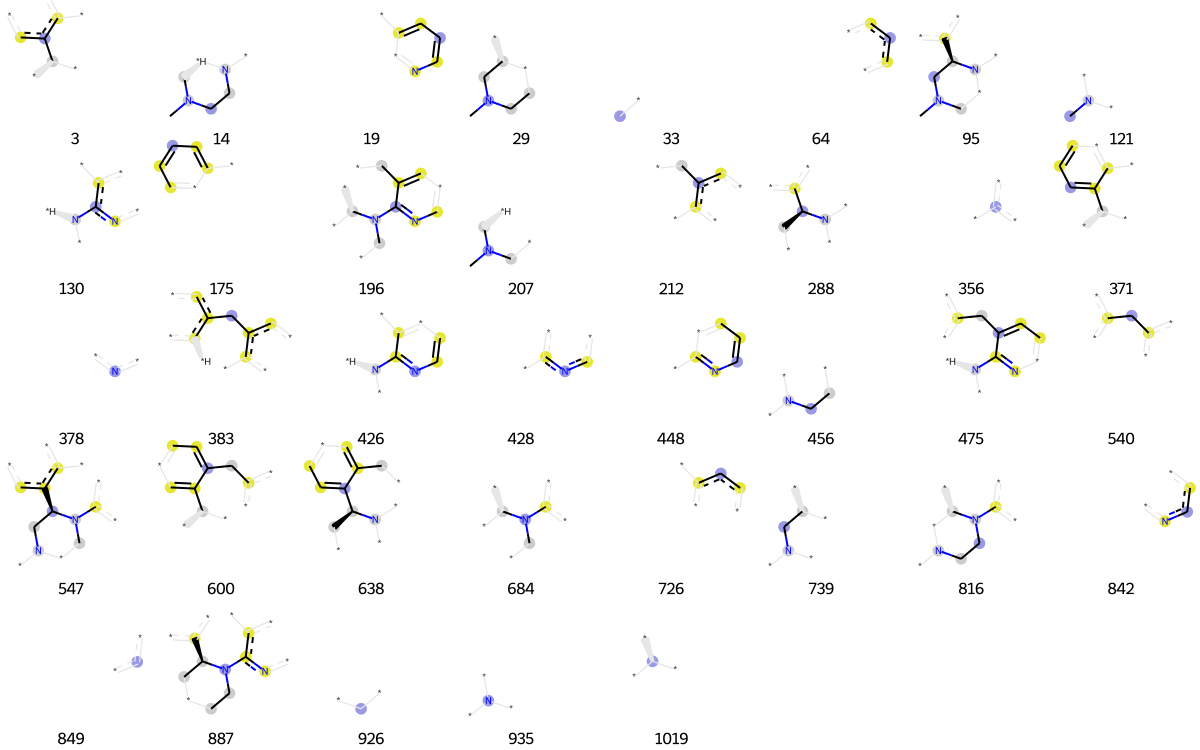

In [891]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [892]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 33,
 78,
 80,
 117,
 128,
 283,
 294,
 347,
 356,
 361,
 366,
 378,
 486,
 526,
 530,
 561,
 650,
 657,
 659,
 666,
 673,
 726,
 739,
 794,
 800,
 807,
 849,
 875,
 893,
 895,
 994]

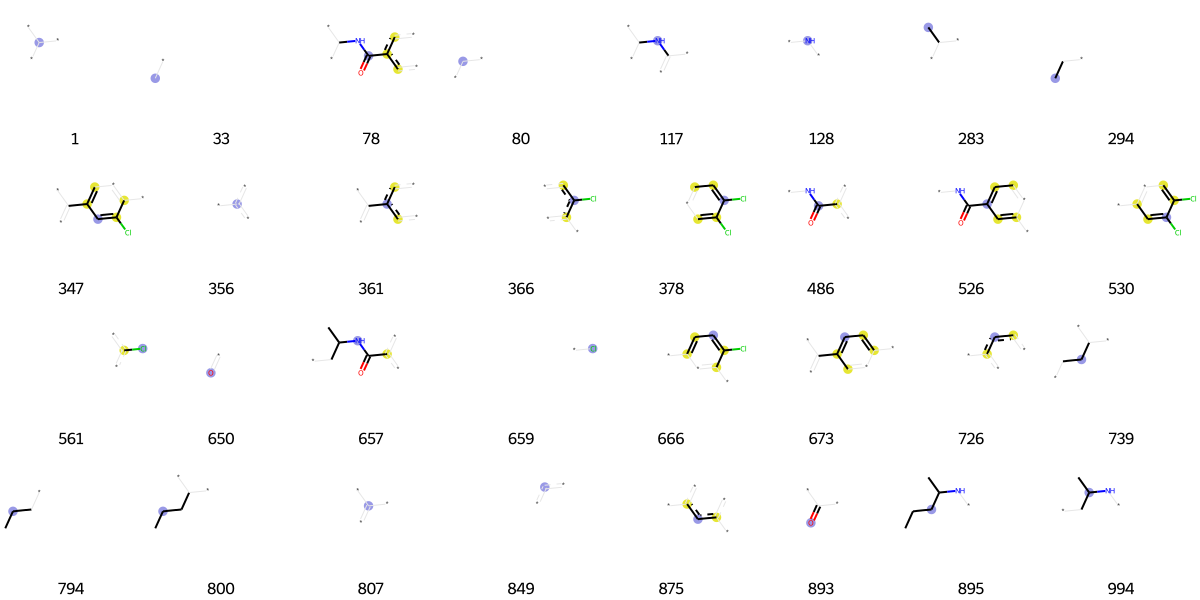

In [893]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [894]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 33,
 64,
 80,
 114,
 118,
 139,
 140,
 147,
 175,
 202,
 249,
 283,
 294,
 350,
 356,
 389,
 393,
 452,
 479,
 577,
 592,
 633,
 637,
 650,
 726,
 807,
 825,
 849,
 881,
 882,
 893,
 914,
 985,
 993]

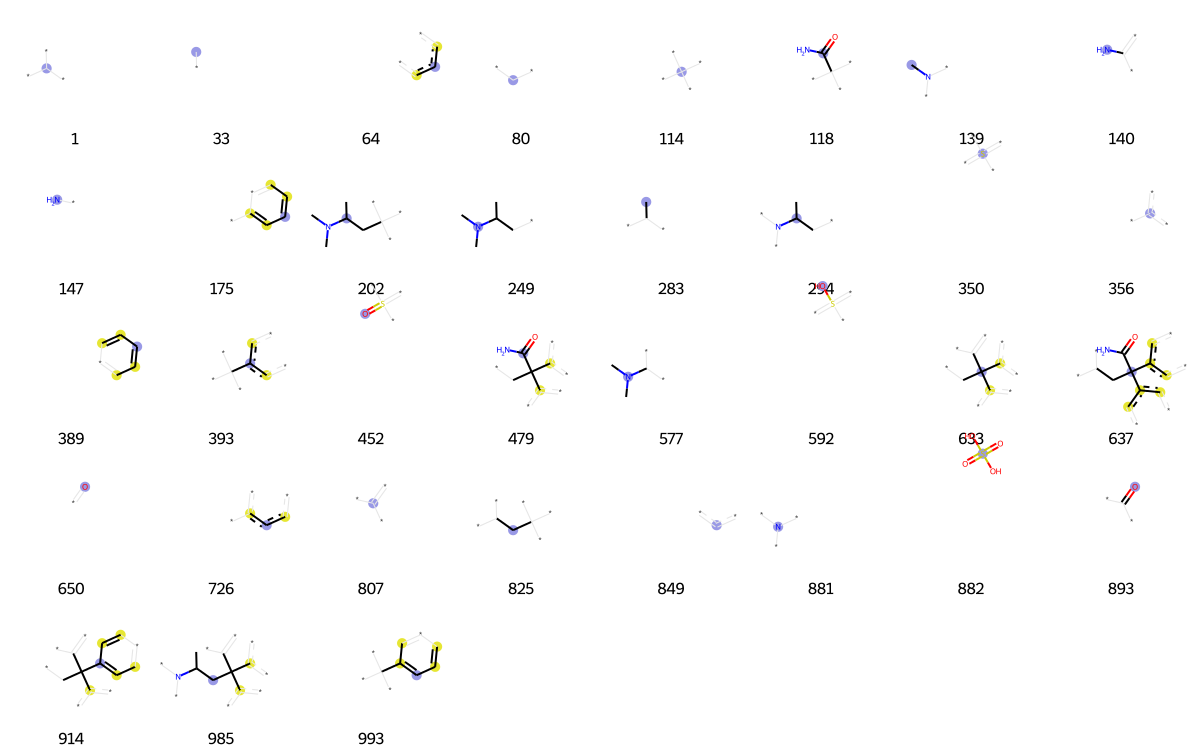

In [895]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [896]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 33,
 64,
 75,
 80,
 121,
 128,
 175,
 283,
 341,
 356,
 378,
 389,
 557,
 603,
 667,
 671,
 687,
 726,
 739,
 782,
 849,
 858,
 890]

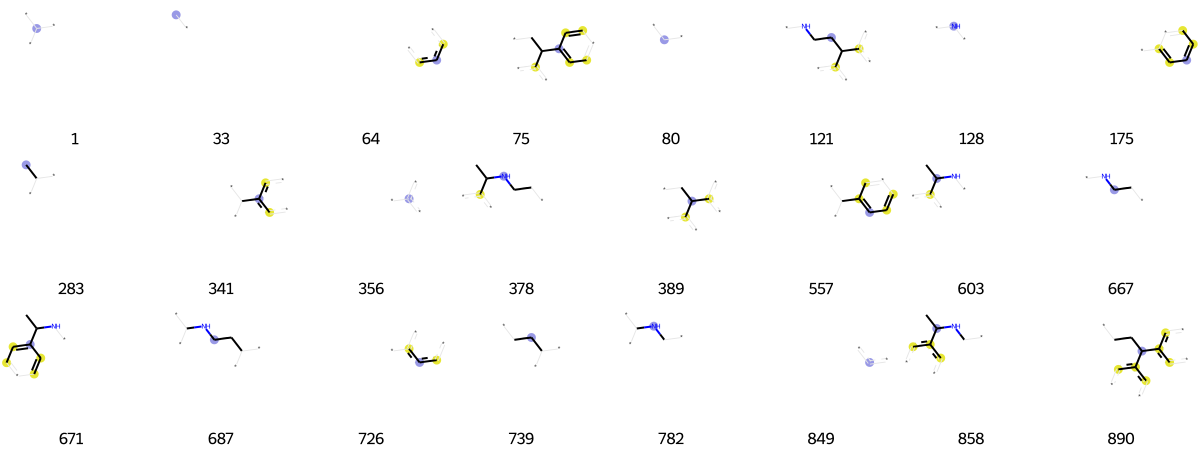

In [897]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [898]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[46,
 80,
 90,
 114,
 136,
 147,
 216,
 274,
 294,
 356,
 359,
 378,
 391,
 393,
 511,
 561,
 609,
 641,
 659,
 671,
 695,
 726,
 807,
 808,
 816,
 849,
 855,
 884,
 896,
 915,
 940,
 980,
 981,
 1002]

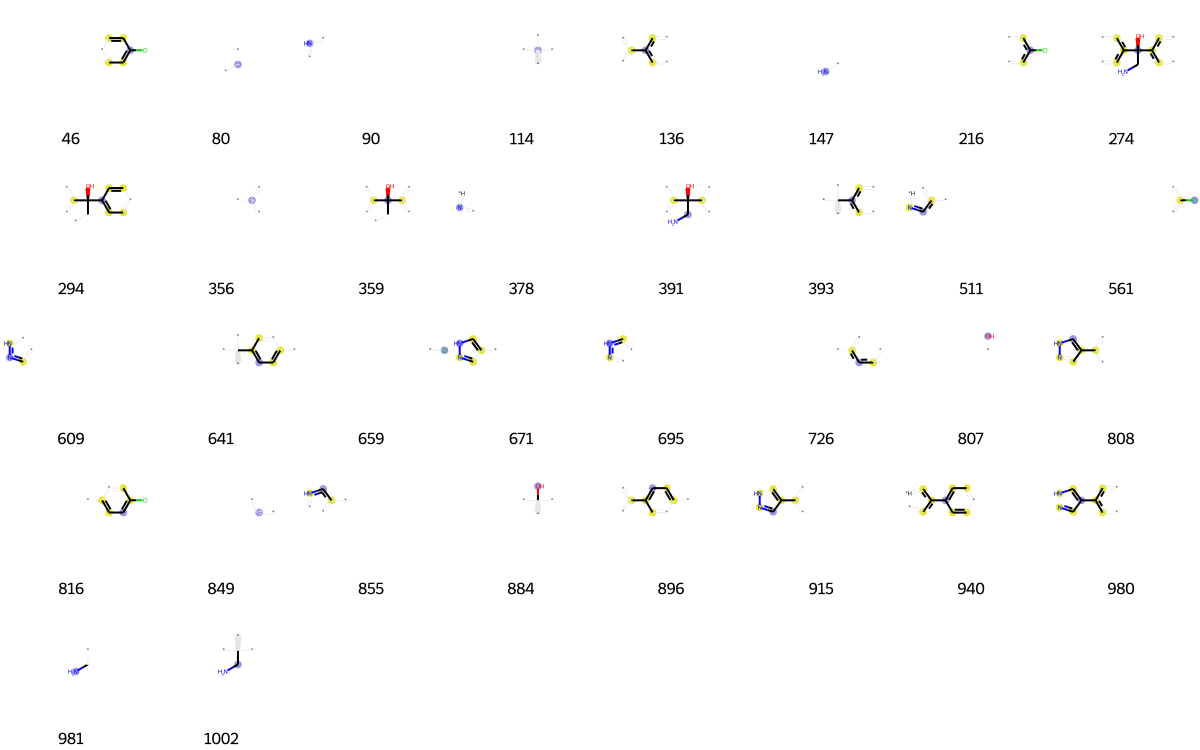

In [899]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [900]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[3,
 33,
 80,
 94,
 109,
 128,
 136,
 144,
 147,
 160,
 197,
 218,
 261,
 285,
 294,
 307,
 320,
 325,
 352,
 356,
 378,
 419,
 433,
 434,
 441,
 454,
 547,
 650,
 656,
 667,
 724,
 726,
 738,
 772,
 776,
 780,
 794,
 807,
 814,
 839,
 849,
 875,
 881,
 882,
 888,
 893,
 896,
 905,
 920,
 926,
 929,
 935,
 1019]

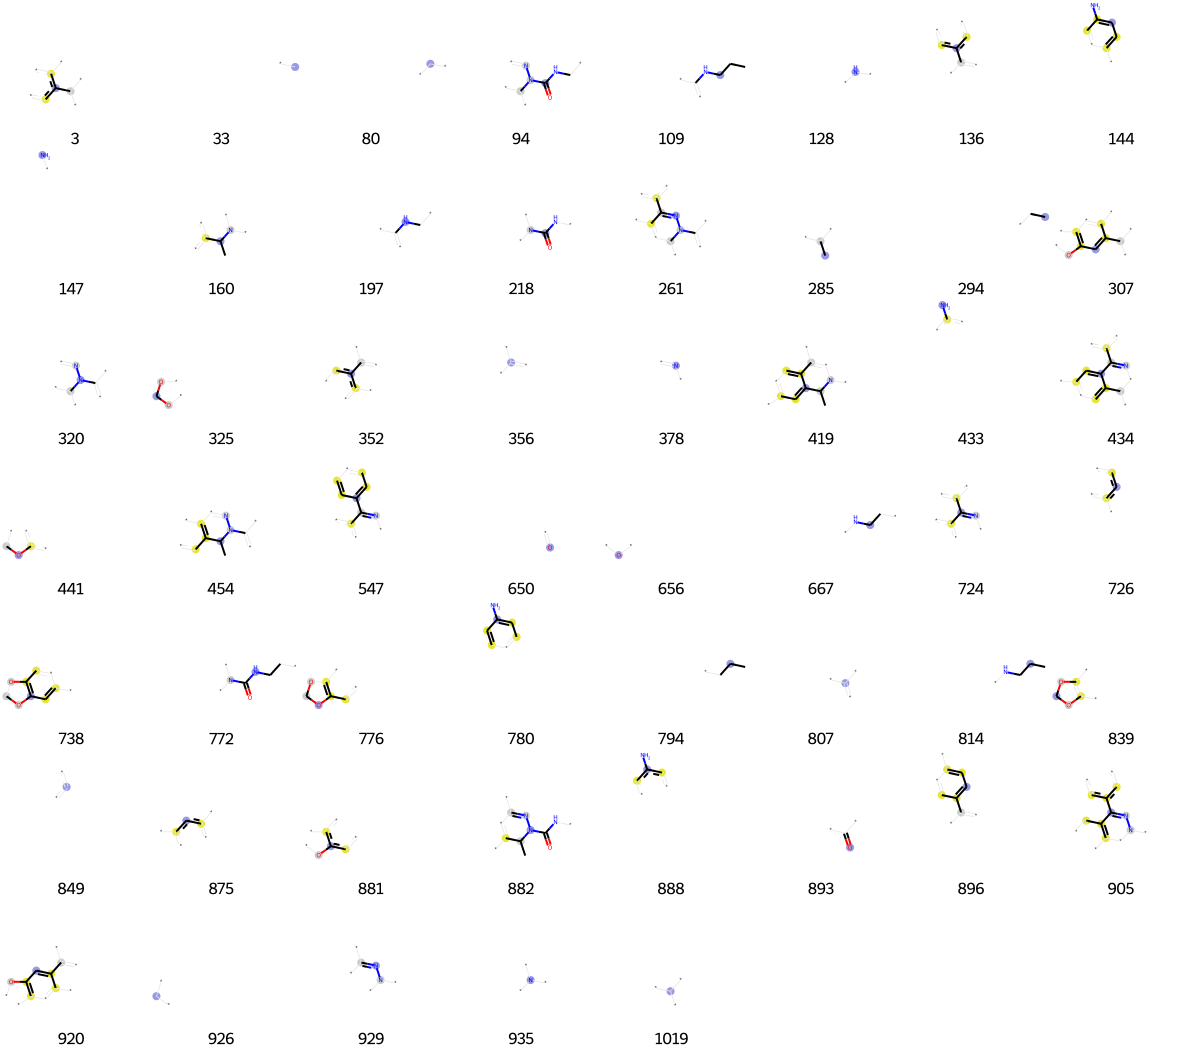

In [901]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [902]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 4,
 13,
 33,
 36,
 64,
 80,
 130,
 138,
 139,
 147,
 175,
 274,
 293,
 300,
 341,
 356,
 389,
 425,
 498,
 557,
 559,
 614,
 644,
 650,
 652,
 687,
 693,
 695,
 726,
 807,
 849,
 881,
 893,
 926,
 927,
 965,
 980]

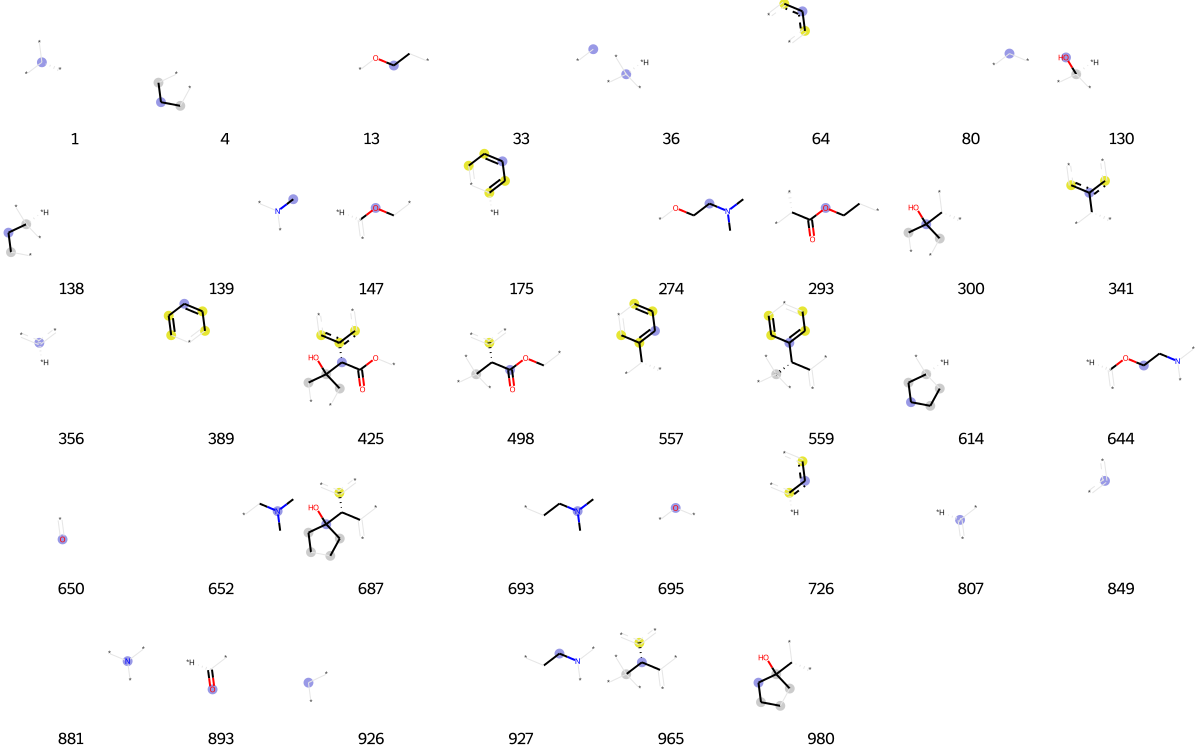

In [903]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [904]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 36,
 41,
 46,
 80,
 85,
 95,
 102,
 128,
 138,
 193,
 196,
 200,
 222,
 233,
 250,
 256,
 262,
 297,
 301,
 462,
 479,
 534,
 539,
 541,
 558,
 568,
 588,
 607,
 639,
 650,
 656,
 659,
 667,
 694,
 695,
 700,
 733,
 734,
 745,
 765,
 798,
 807,
 841,
 893,
 912,
 926,
 937,
 991,
 1017,
 1019]

In [905]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 36,
 57,
 75,
 84,
 127,
 130,
 138,
 182,
 184,
 242,
 250,
 253,
 289,
 292,
 301,
 314,
 345,
 356,
 364,
 408,
 412,
 436,
 441,
 455,
 507,
 519,
 529,
 555,
 559,
 622,
 649,
 650,
 674,
 714,
 717,
 807,
 841,
 849,
 909,
 915,
 926,
 974,
 1019]

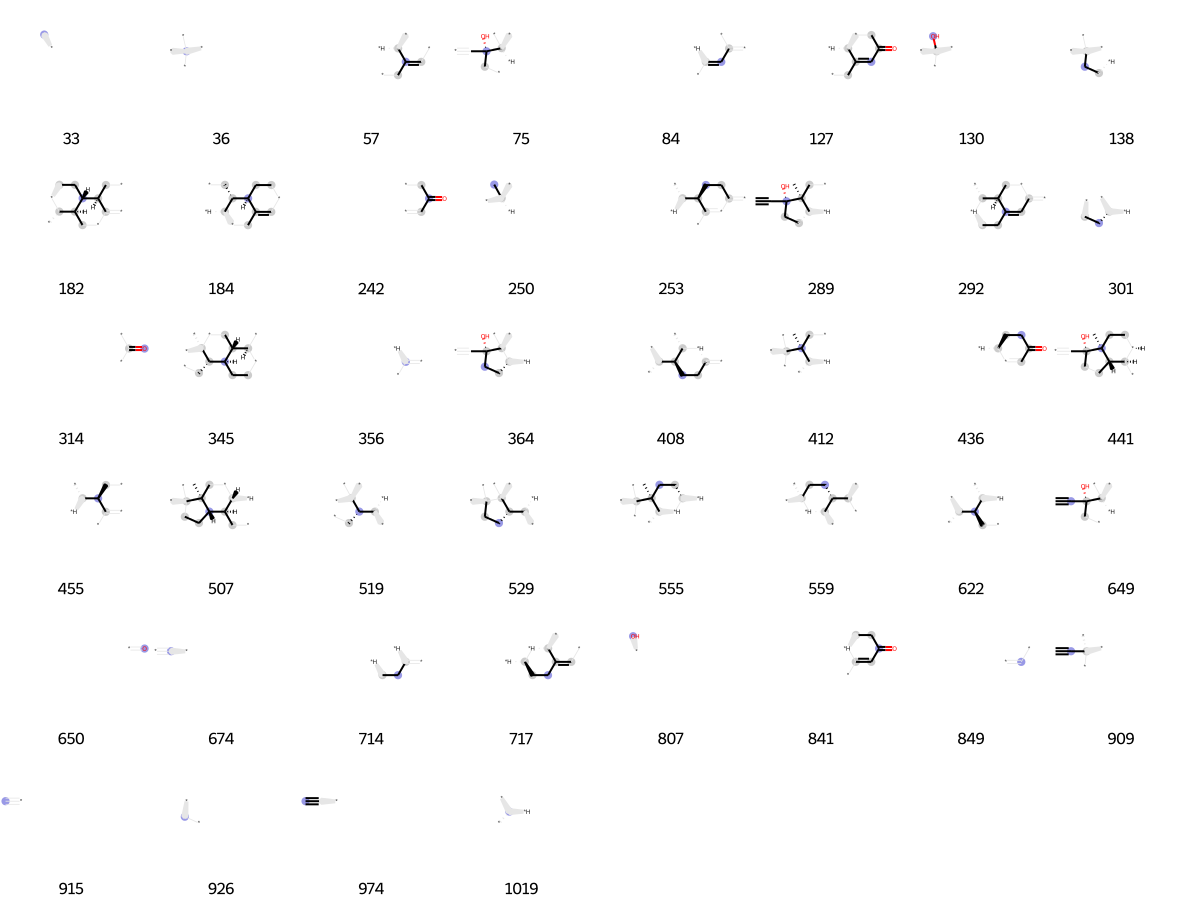

In [906]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [907]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[3,
 4,
 11,
 39,
 64,
 84,
 118,
 255,
 289,
 301,
 356,
 381,
 416,
 423,
 455,
 578,
 594,
 622,
 656,
 713,
 726,
 745,
 750,
 754,
 775,
 779,
 807,
 849,
 875,
 876,
 881,
 926,
 937,
 983,
 1019]

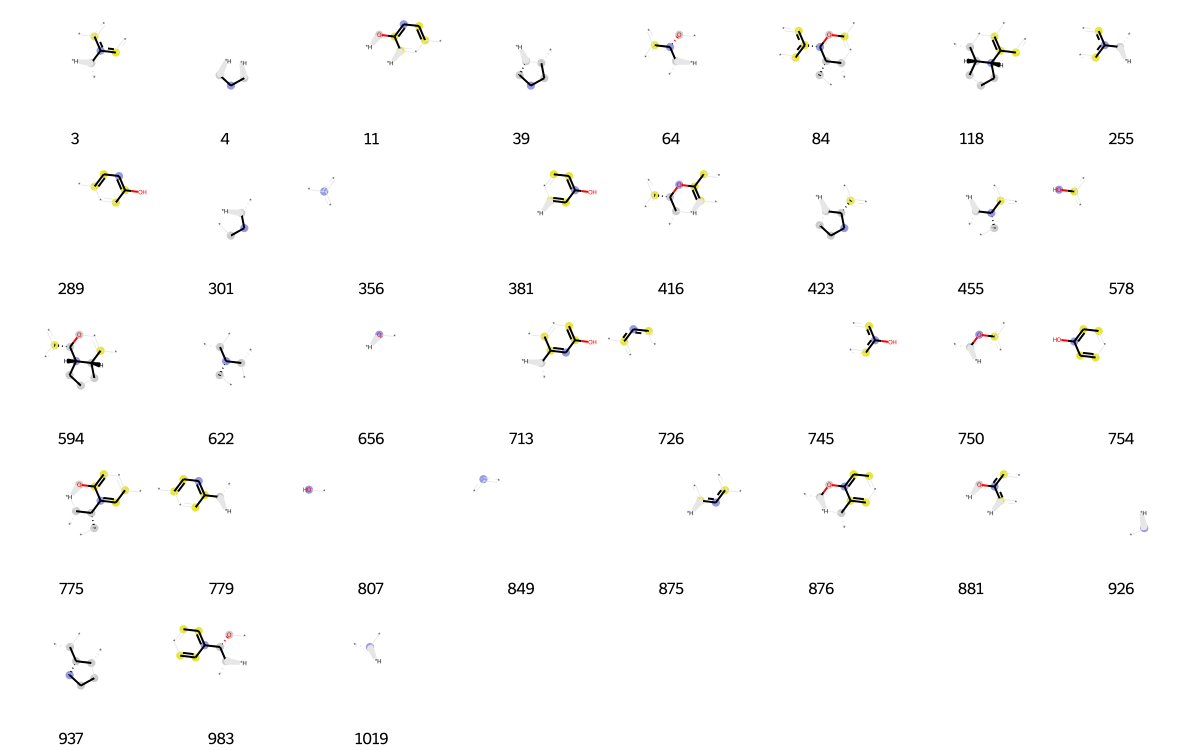

In [908]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [909]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[33,
 53,
 69,
 80,
 102,
 128,
 161,
 167,
 191,
 202,
 214,
 237,
 294,
 322,
 356,
 428,
 589,
 616,
 695,
 718,
 725,
 726,
 792,
 807,
 829,
 830,
 843,
 849,
 946,
 1017]

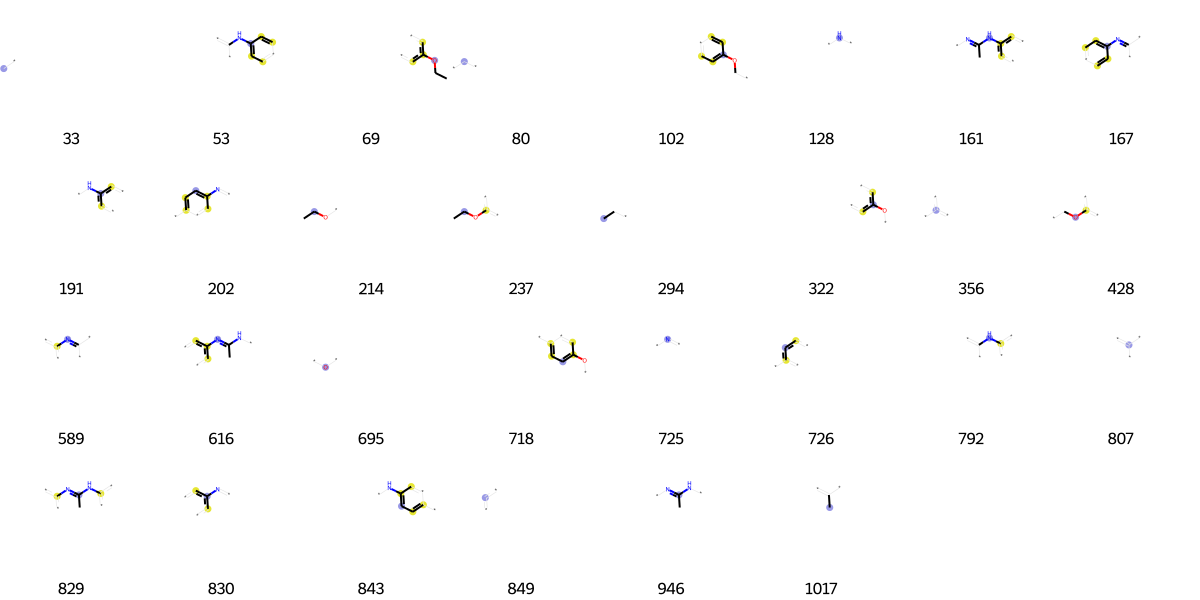

In [910]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [911]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 33,
 54,
 80,
 117,
 128,
 138,
 147,
 283,
 425,
 458,
 496,
 523,
 573,
 650,
 680,
 695,
 736,
 759,
 786,
 807,
 823,
 825,
 841,
 890,
 893,
 992]

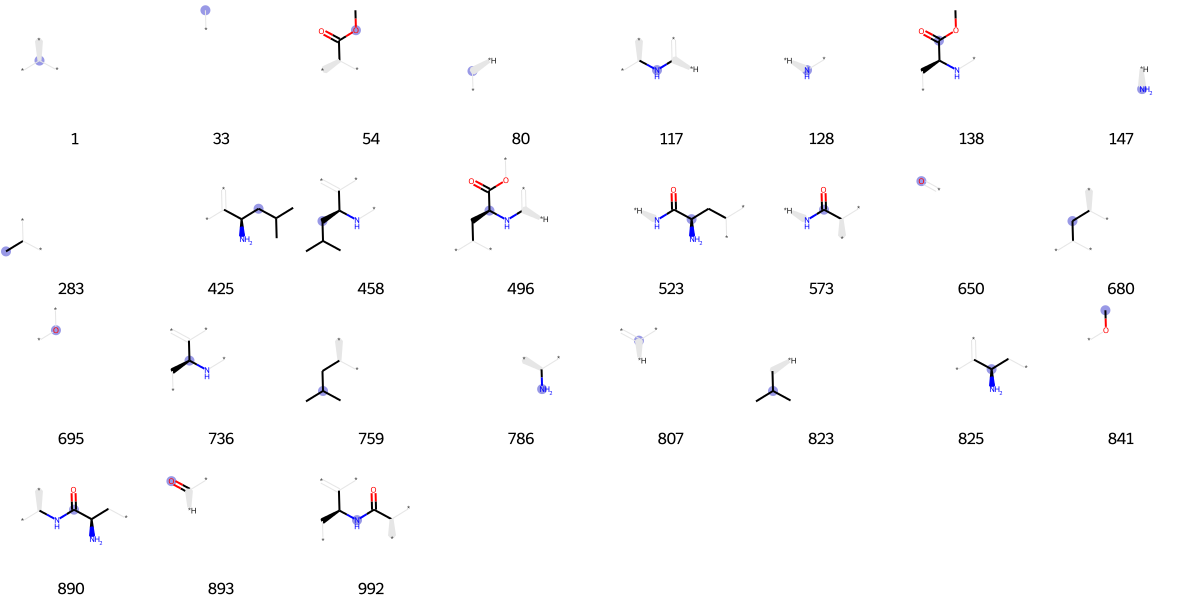

In [912]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [913]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[9,
 33,
 46,
 80,
 121,
 216,
 273,
 299,
 325,
 356,
 361,
 367,
 389,
 463,
 561,
 564,
 587,
 650,
 659,
 663,
 673,
 698,
 710,
 713,
 726,
 751,
 760,
 807,
 816,
 849,
 861,
 875,
 893,
 914,
 935,
 959]

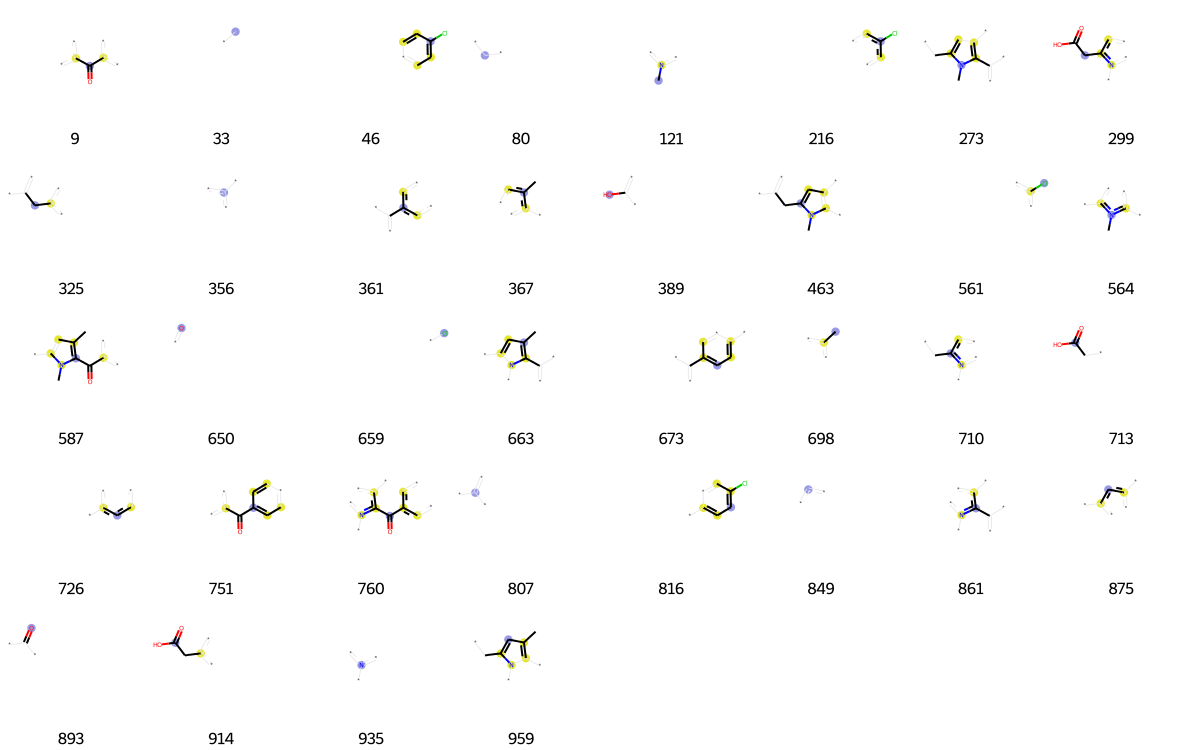

In [914]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [915]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[64,
 103,
 114,
 175,
 306,
 342,
 356,
 360,
 366,
 389,
 393,
 419,
 561,
 584,
 645,
 659,
 674,
 726,
 790,
 849,
 915,
 923,
 974,
 993]

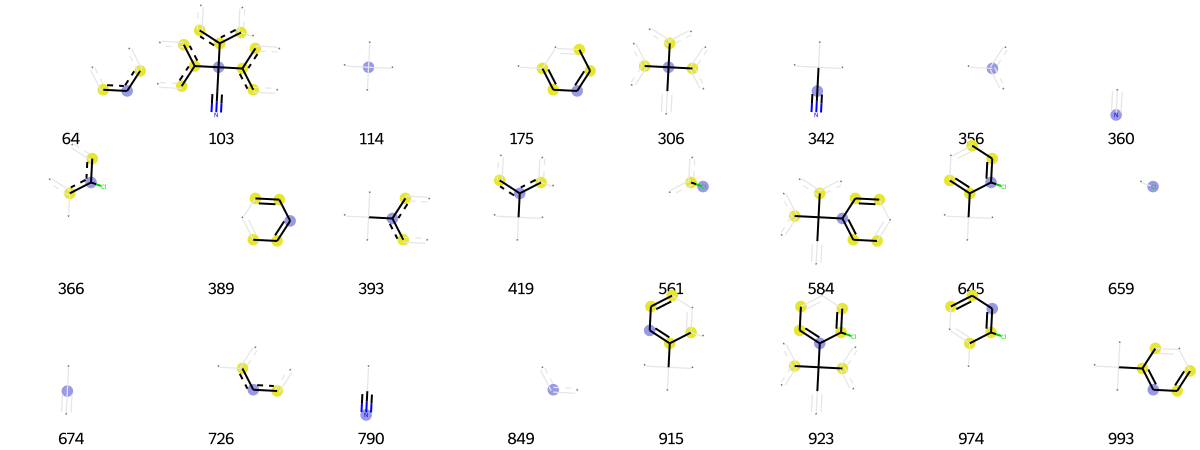

In [916]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [917]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[12,
 13,
 33,
 45,
 71,
 74,
 80,
 104,
 121,
 128,
 133,
 147,
 171,
 200,
 222,
 262,
 345,
 356,
 378,
 381,
 385,
 421,
 428,
 447,
 459,
 473,
 486,
 491,
 493,
 607,
 624,
 650,
 695,
 699,
 700,
 701,
 726,
 728,
 766,
 768,
 785,
 807,
 816,
 832,
 836,
 842,
 849,
 875,
 877,
 884,
 891,
 893,
 904,
 909,
 932,
 935,
 967]

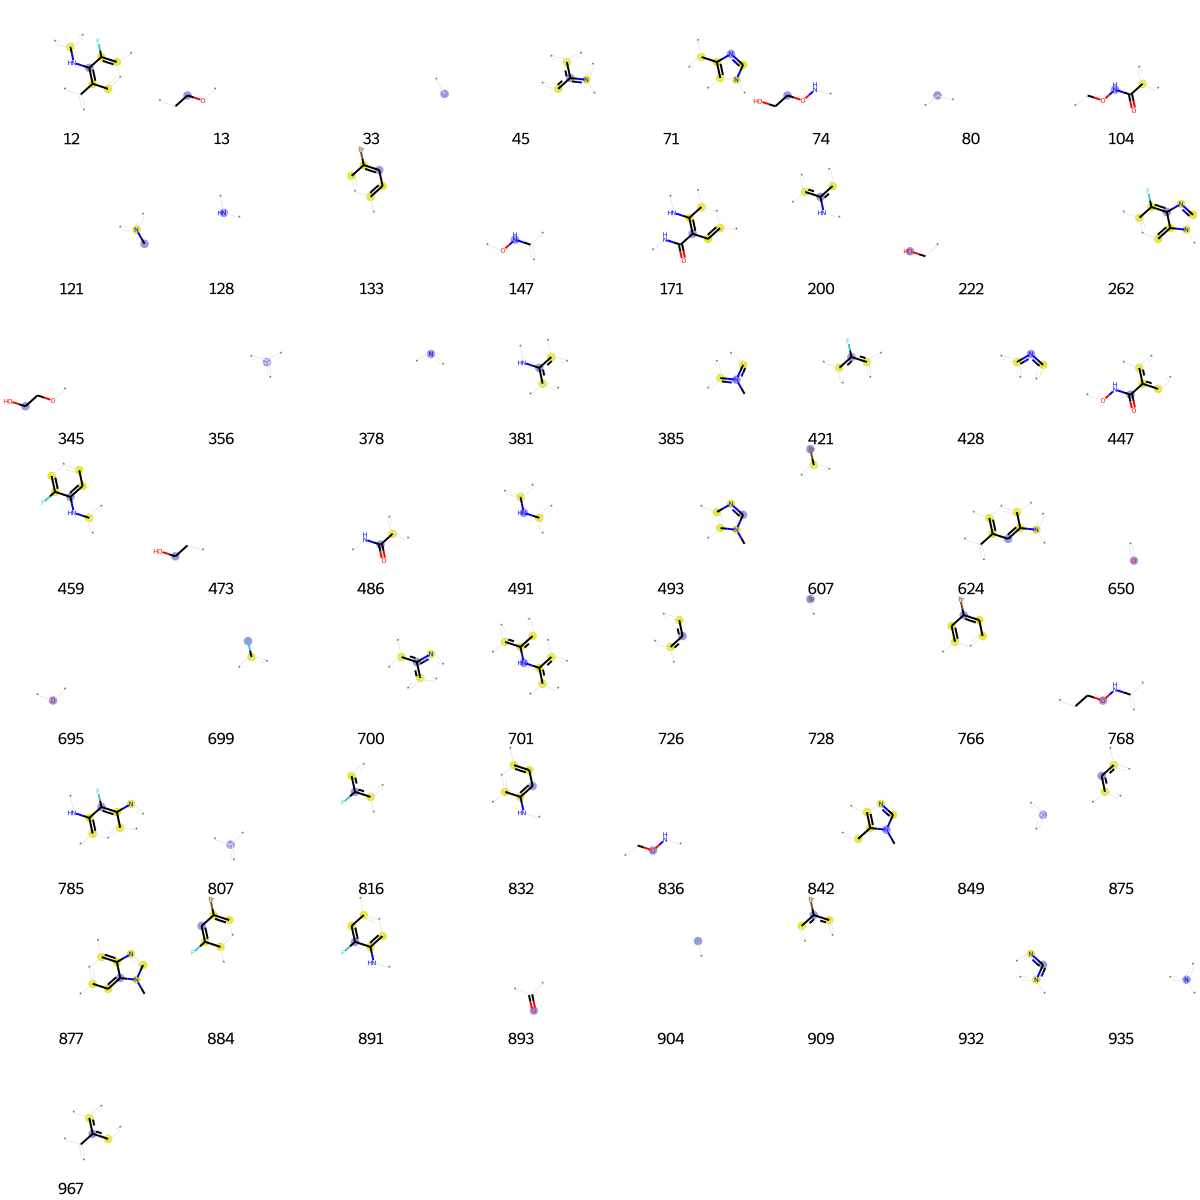

In [918]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [919]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[19,
 27,
 33,
 34,
 41,
 64,
 80,
 147,
 165,
 212,
 214,
 216,
 294,
 323,
 342,
 352,
 355,
 356,
 378,
 408,
 428,
 448,
 456,
 561,
 570,
 571,
 576,
 641,
 650,
 659,
 680,
 684,
 695,
 698,
 714,
 726,
 768,
 779,
 807,
 815,
 816,
 826,
 842,
 849,
 875,
 882,
 893,
 926,
 935,
 969,
 985]

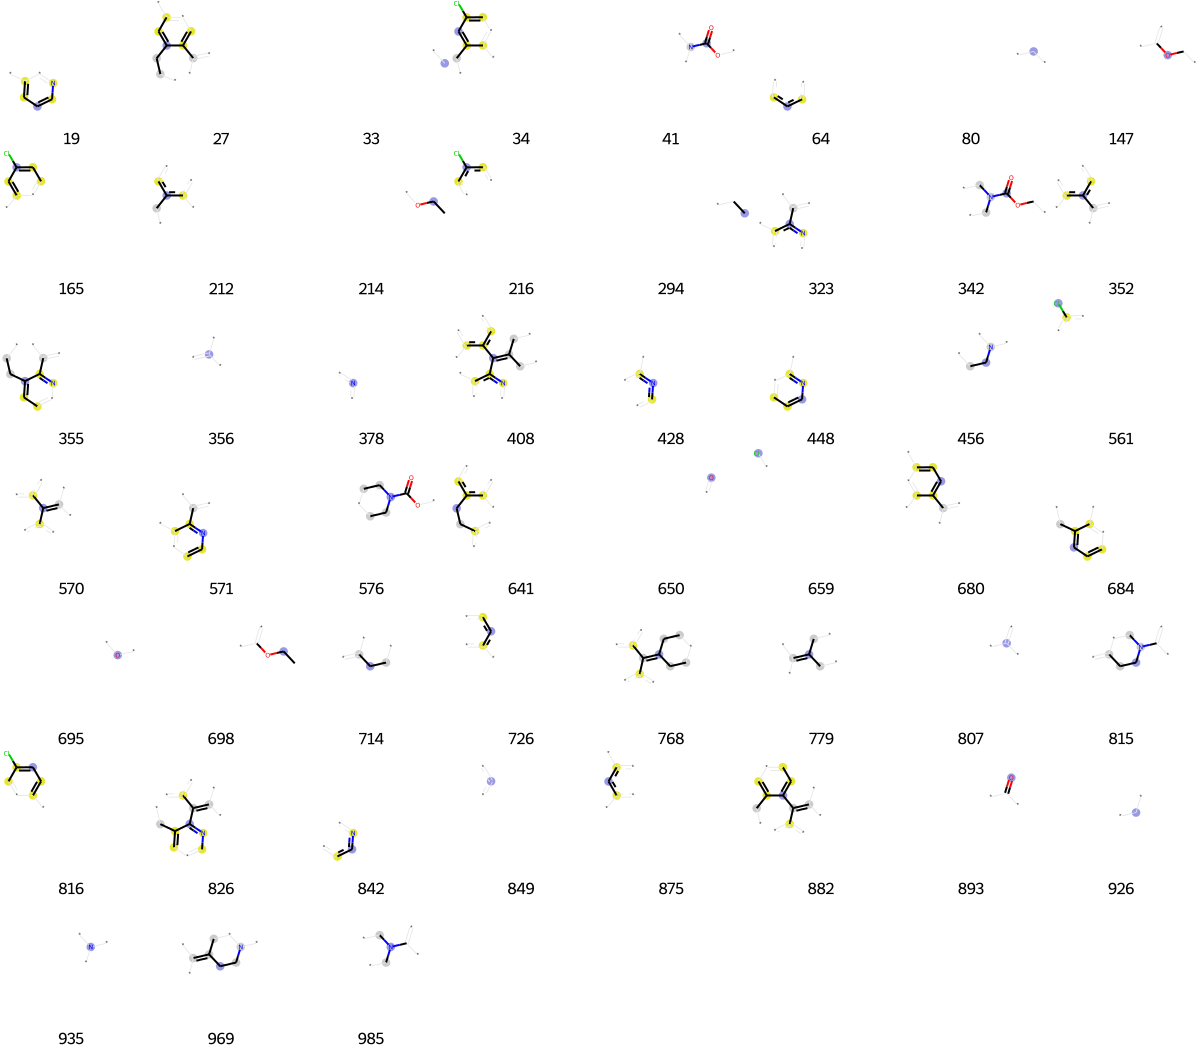

In [920]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [921]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[15,
 64,
 131,
 165,
 216,
 314,
 329,
 356,
 486,
 538,
 561,
 592,
 659,
 694,
 725,
 726,
 800,
 849,
 864,
 875,
 1009]

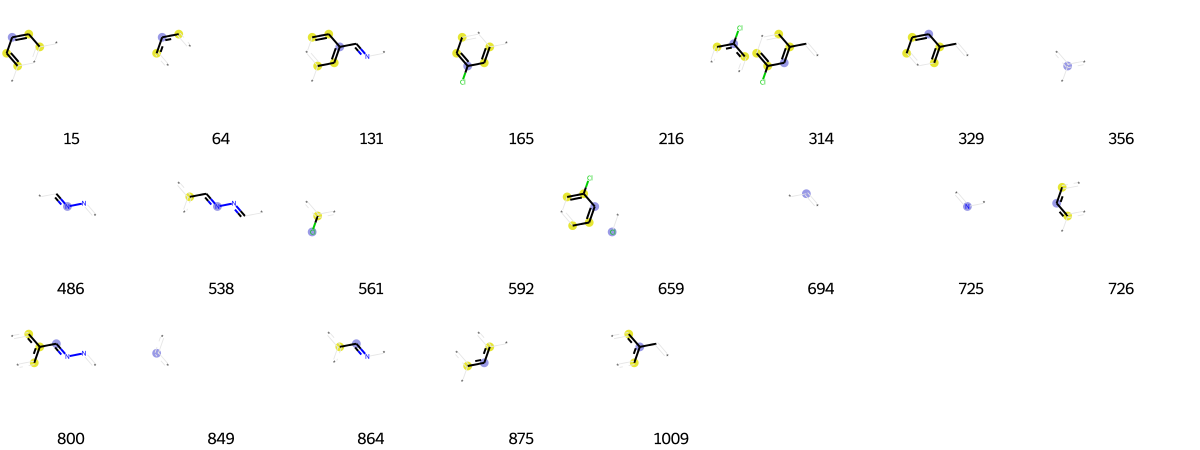

In [922]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [923]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[8,
 12,
 19,
 36,
 42,
 64,
 73,
 75,
 80,
 112,
 115,
 128,
 168,
 191,
 216,
 255,
 329,
 333,
 356,
 360,
 361,
 366,
 378,
 381,
 392,
 428,
 437,
 458,
 464,
 465,
 474,
 491,
 511,
 524,
 557,
 561,
 562,
 579,
 645,
 659,
 674,
 680,
 699,
 726,
 730,
 777,
 790,
 791,
 816,
 838,
 842,
 843,
 848,
 849,
 875,
 904,
 974,
 980]

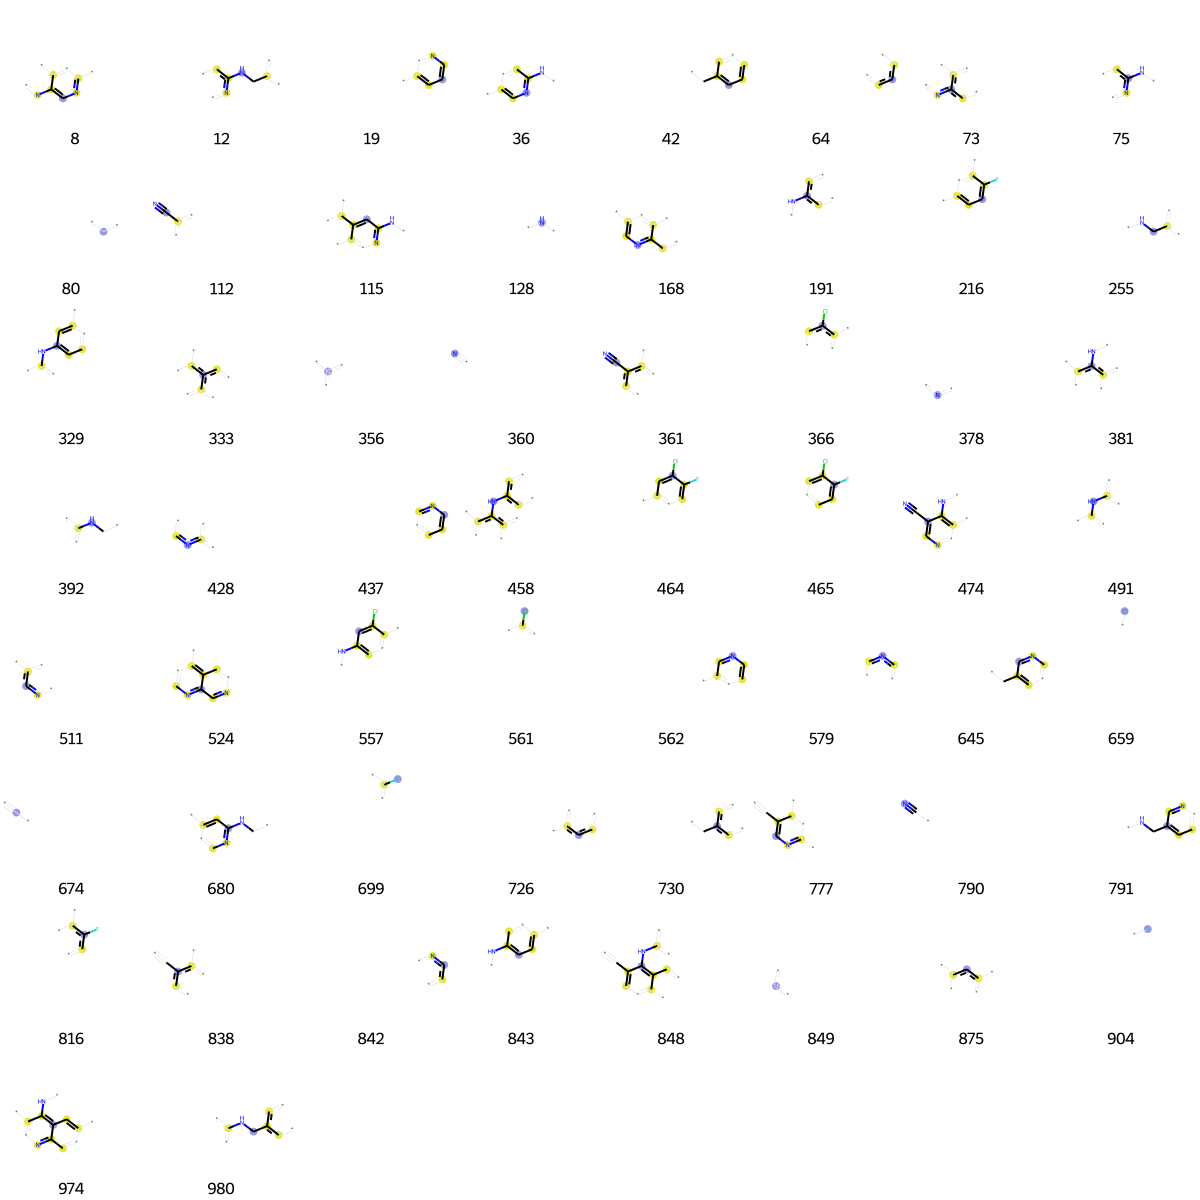

In [924]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [925]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[11,
 33,
 36,
 79,
 84,
 86,
 93,
 102,
 138,
 157,
 176,
 184,
 240,
 249,
 250,
 266,
 267,
 285,
 301,
 314,
 356,
 375,
 389,
 412,
 418,
 443,
 453,
 470,
 474,
 478,
 516,
 521,
 555,
 558,
 559,
 621,
 650,
 695,
 708,
 729,
 772,
 781,
 807,
 835,
 849,
 853,
 855,
 857,
 858,
 861,
 872,
 893,
 926,
 927,
 935,
 973,
 992,
 1017,
 1019]

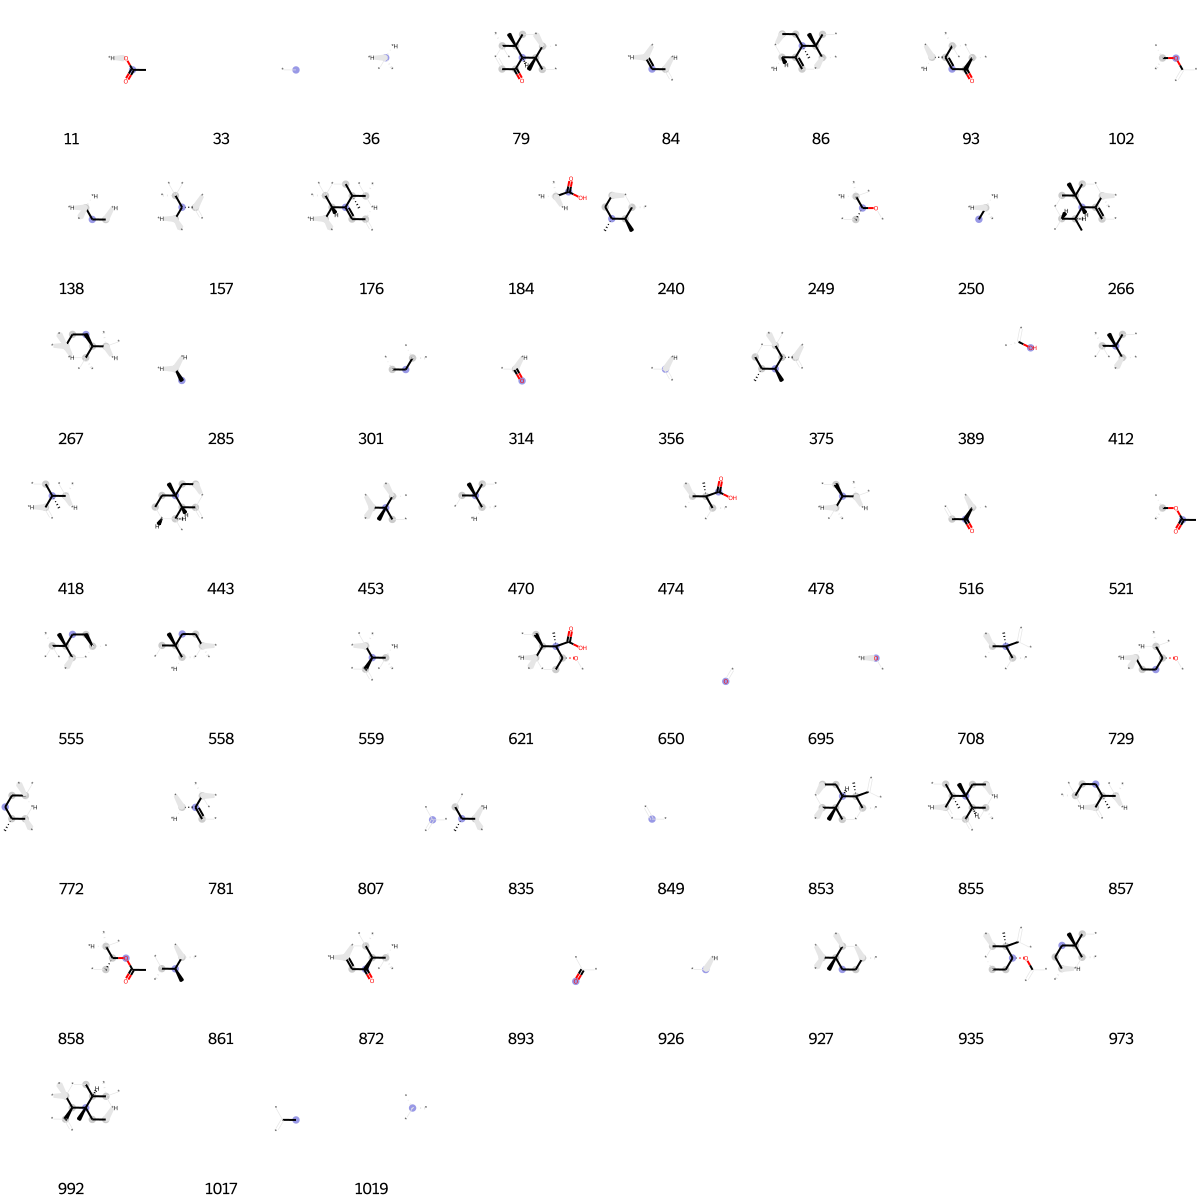

In [926]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [927]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 11,
 14,
 17,
 33,
 36,
 80,
 117,
 121,
 128,
 179,
 207,
 212,
 218,
 255,
 280,
 290,
 291,
 294,
 299,
 314,
 322,
 325,
 327,
 341,
 356,
 361,
 441,
 456,
 480,
 487,
 497,
 524,
 546,
 560,
 562,
 563,
 565,
 573,
 619,
 623,
 640,
 650,
 656,
 666,
 673,
 695,
 718,
 726,
 738,
 739,
 776,
 794,
 800,
 807,
 829,
 839,
 849,
 875,
 881,
 893,
 926,
 935,
 938,
 942,
 964,
 985,
 1005,
 1019]

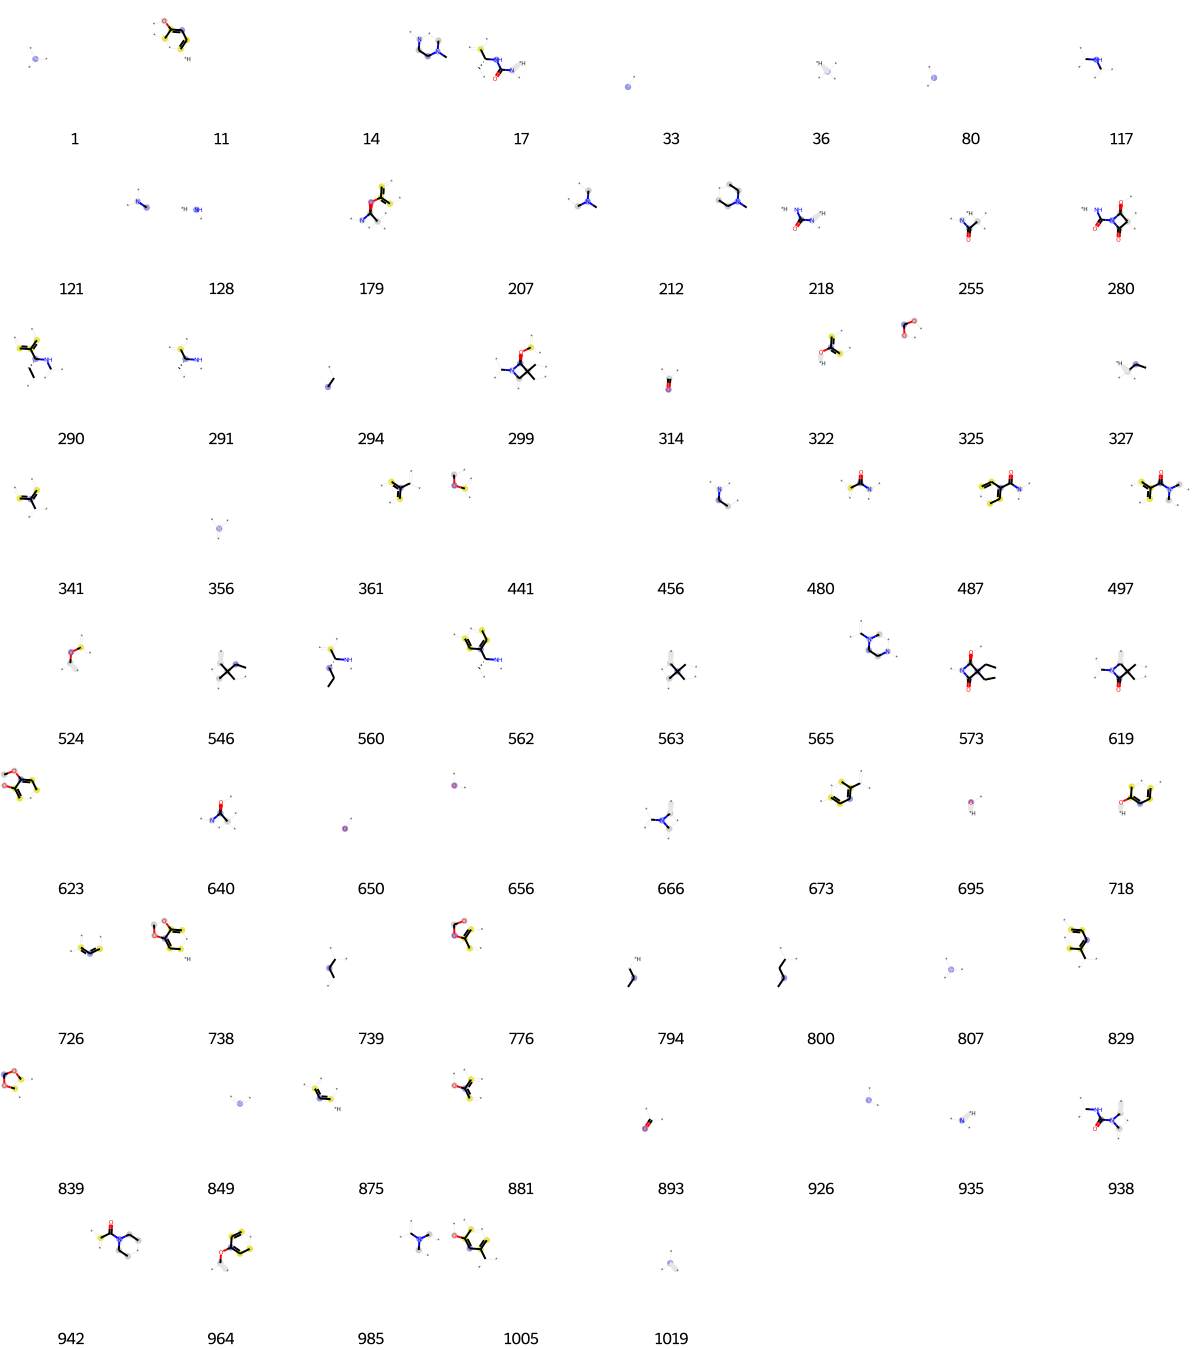

In [928]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [929]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[4,
 33,
 36,
 57,
 65,
 84,
 138,
 189,
 192,
 250,
 252,
 273,
 285,
 314,
 325,
 350,
 352,
 353,
 354,
 356,
 361,
 367,
 370,
 390,
 394,
 444,
 452,
 580,
 614,
 642,
 649,
 650,
 656,
 680,
 698,
 714,
 715,
 723,
 726,
 766,
 827,
 849,
 926,
 953,
 956,
 1004]

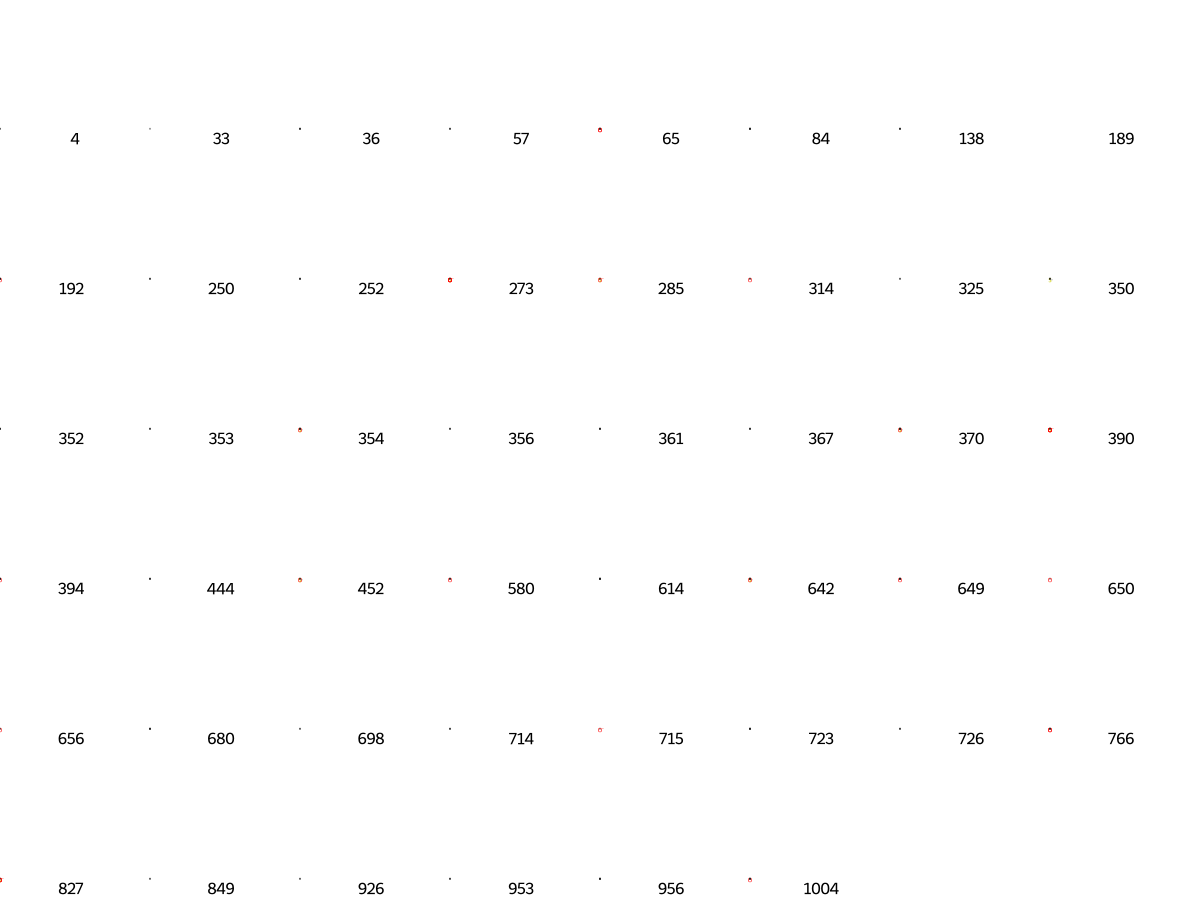

In [930]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [931]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[189, 192, 202, 486, 545, 560, 563, 565, 650, 715, 807, 893]

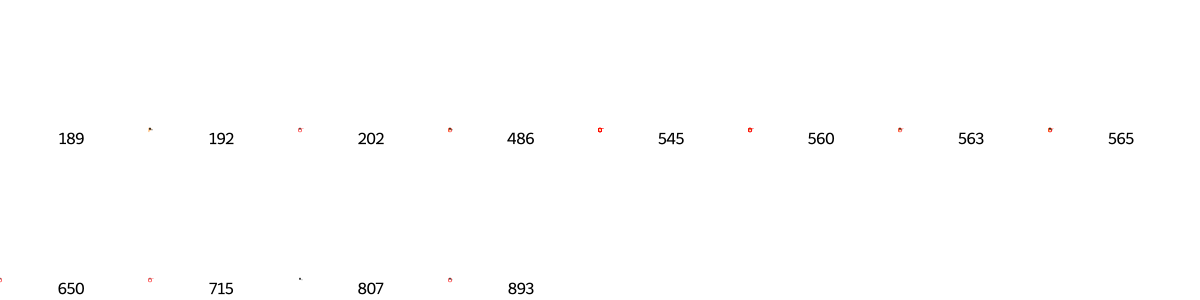

In [932]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [933]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[4,
 62,
 77,
 80,
 117,
 147,
 222,
 257,
 301,
 304,
 314,
 356,
 367,
 378,
 396,
 424,
 433,
 440,
 485,
 492,
 498,
 511,
 577,
 606,
 650,
 656,
 726,
 807,
 831,
 849,
 863,
 897,
 912,
 926,
 935,
 1018,
 1019]

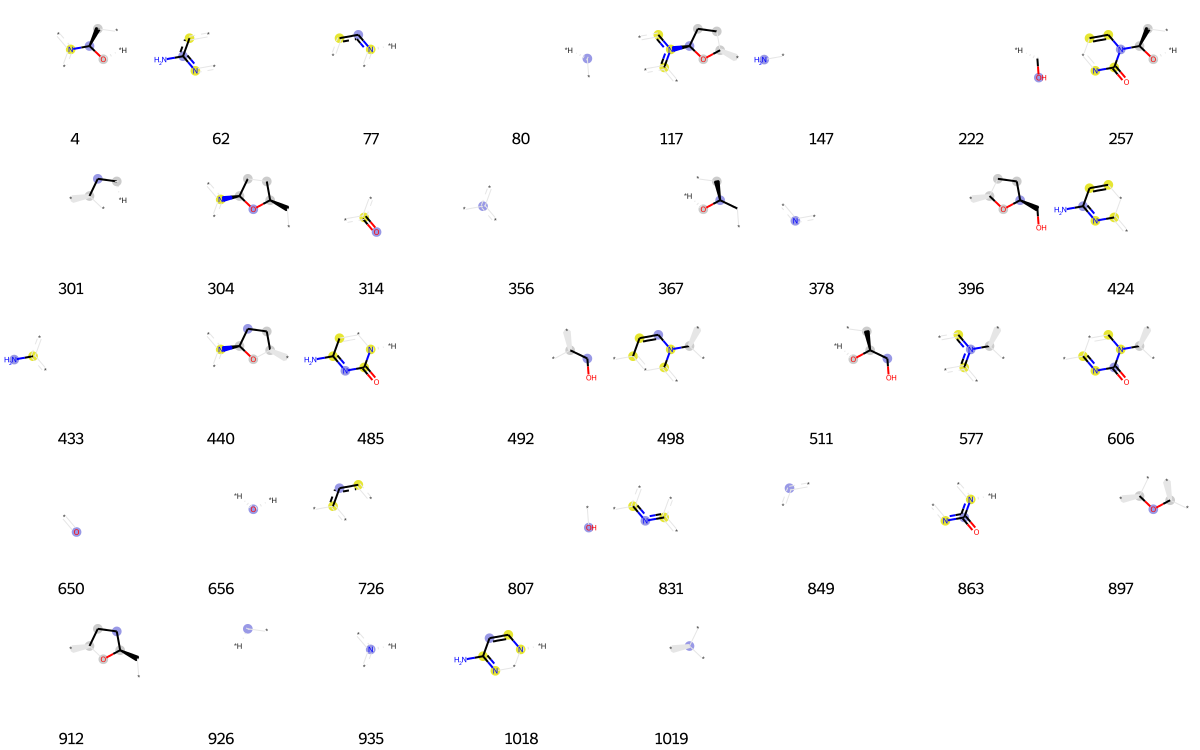

In [934]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [935]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[25,
 31,
 33,
 45,
 73,
 80,
 121,
 128,
 157,
 166,
 193,
 219,
 233,
 251,
 284,
 294,
 318,
 327,
 356,
 370,
 378,
 464,
 465,
 510,
 515,
 591,
 607,
 620,
 650,
 694,
 713,
 726,
 794,
 802,
 807,
 818,
 831,
 835,
 849,
 875,
 878,
 881,
 887,
 888,
 893,
 927,
 932,
 935,
 957,
 975,
 997,
 1009,
 1017]

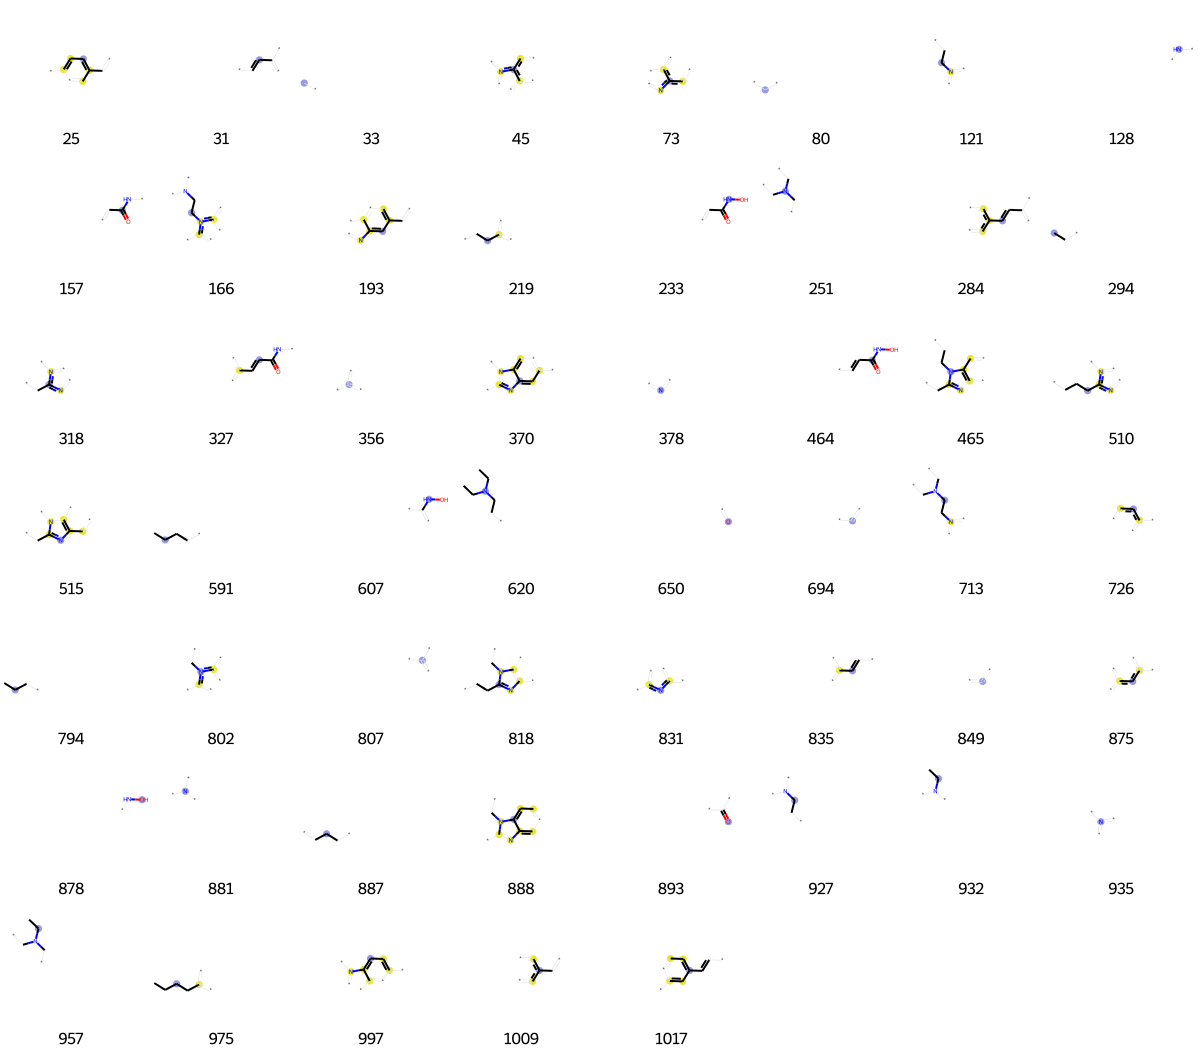

In [936]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [937]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[11,
 18,
 33,
 78,
 80,
 116,
 126,
 128,
 136,
 140,
 147,
 158,
 186,
 197,
 274,
 287,
 351,
 356,
 360,
 378,
 447,
 532,
 543,
 552,
 589,
 599,
 622,
 656,
 658,
 667,
 674,
 675,
 684,
 702,
 724,
 725,
 753,
 762,
 790,
 807,
 831,
 849,
 874,
 887,
 943,
 949,
 953]

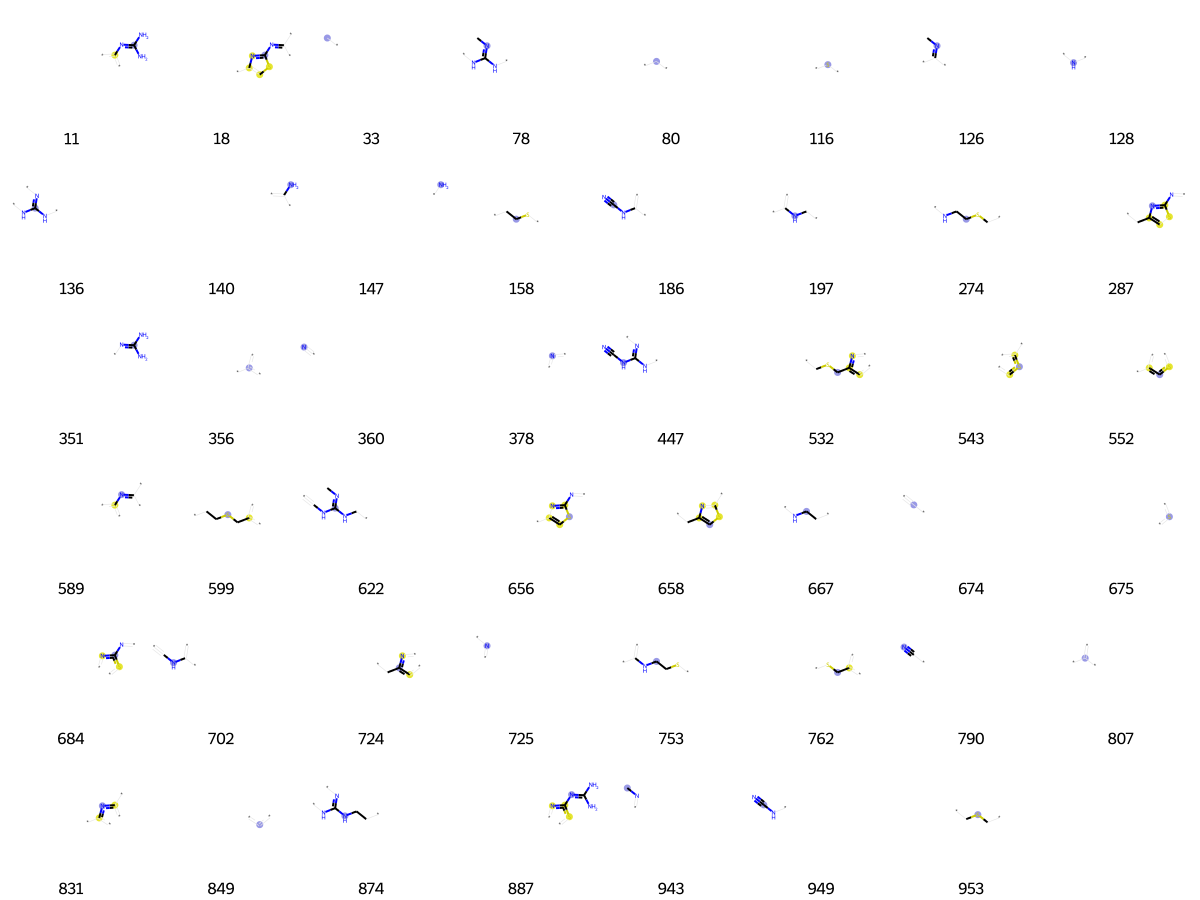

In [938]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [939]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 26,
 31,
 33,
 41,
 46,
 80,
 102,
 119,
 121,
 147,
 191,
 216,
 268,
 278,
 294,
 301,
 322,
 338,
 356,
 389,
 440,
 508,
 520,
 561,
 650,
 659,
 664,
 670,
 694,
 695,
 718,
 726,
 780,
 806,
 807,
 816,
 838,
 849,
 883,
 886,
 892,
 893,
 926,
 935,
 968,
 976,
 1019]

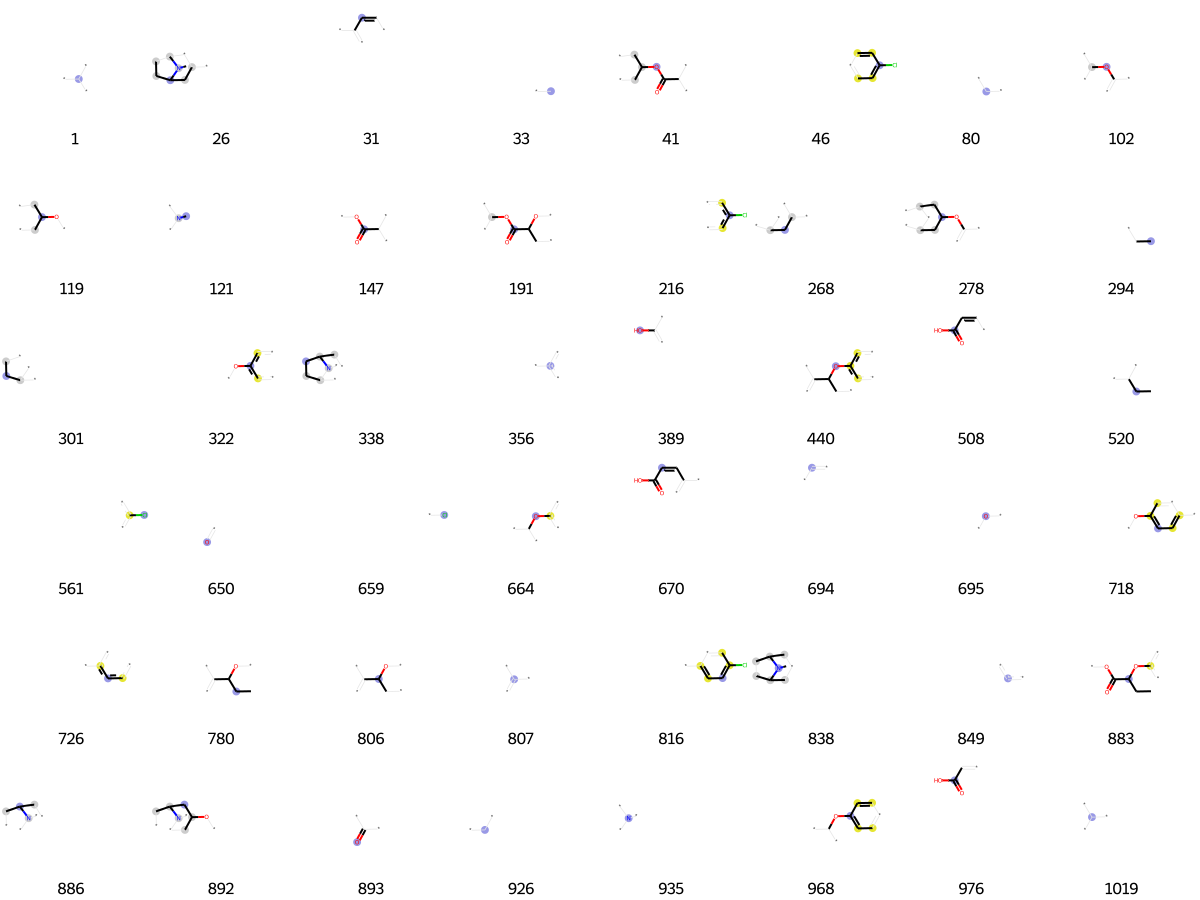

In [940]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [941]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 36,
 64,
 80,
 128,
 138,
 175,
 235,
 250,
 280,
 324,
 356,
 389,
 406,
 436,
 485,
 556,
 604,
 656,
 667,
 706,
 718,
 726,
 740,
 762,
 772,
 795,
 849,
 880,
 887,
 890,
 892,
 956,
 971]

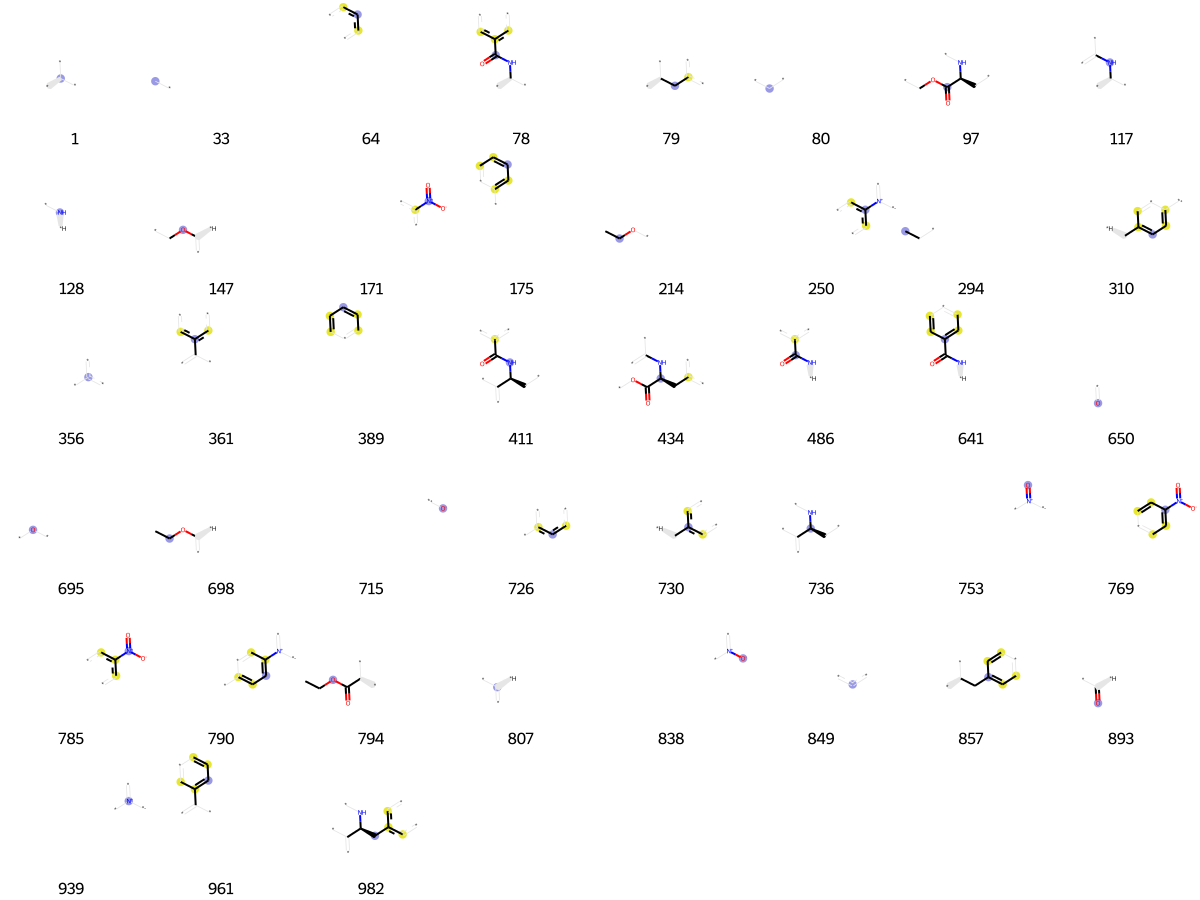

In [942]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [943]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 59,
 73,
 99,
 128,
 136,
 200,
 246,
 281,
 333,
 350,
 352,
 356,
 378,
 386,
 392,
 401,
 421,
 428,
 452,
 463,
 477,
 502,
 503,
 511,
 512,
 552,
 562,
 583,
 594,
 601,
 613,
 629,
 640,
 646,
 650,
 695,
 699,
 714,
 726,
 754,
 766,
 785,
 787,
 789,
 798,
 807,
 816,
 818,
 841,
 842,
 849,
 875,
 896,
 904,
 926,
 927,
 961,
 967,
 1017]

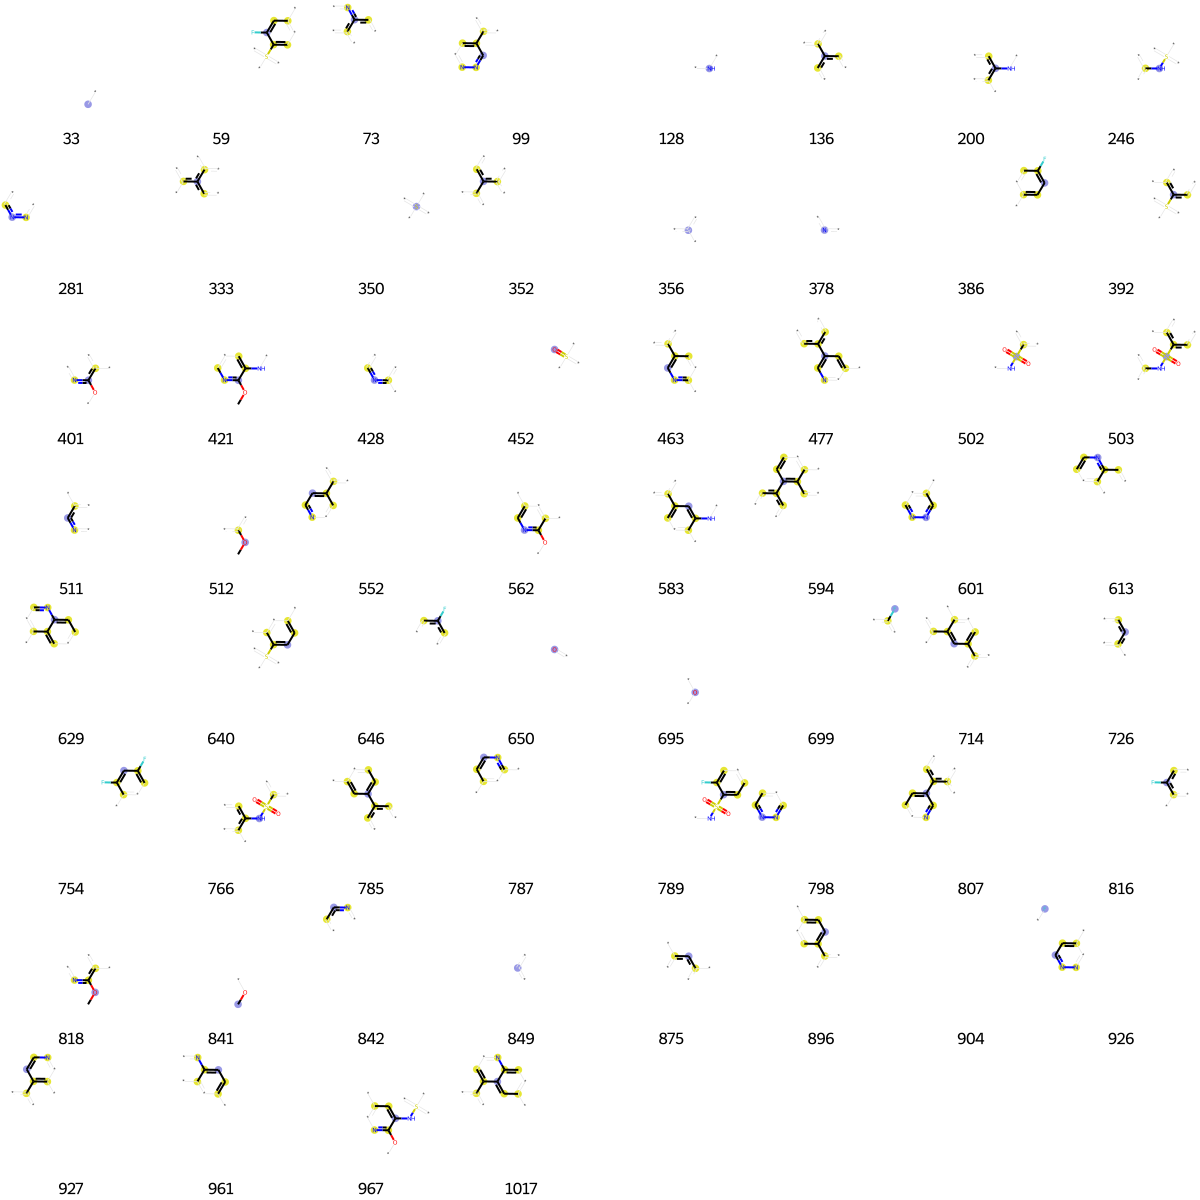

In [944]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [945]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 22,
 31,
 33,
 36,
 96,
 116,
 138,
 144,
 173,
 235,
 250,
 256,
 259,
 295,
 325,
 356,
 361,
 389,
 432,
 444,
 476,
 479,
 488,
 500,
 552,
 602,
 618,
 642,
 650,
 673,
 694,
 698,
 714,
 718,
 726,
 799,
 803,
 807,
 835,
 849,
 893,
 896,
 926,
 932,
 953,
 976,
 1017]

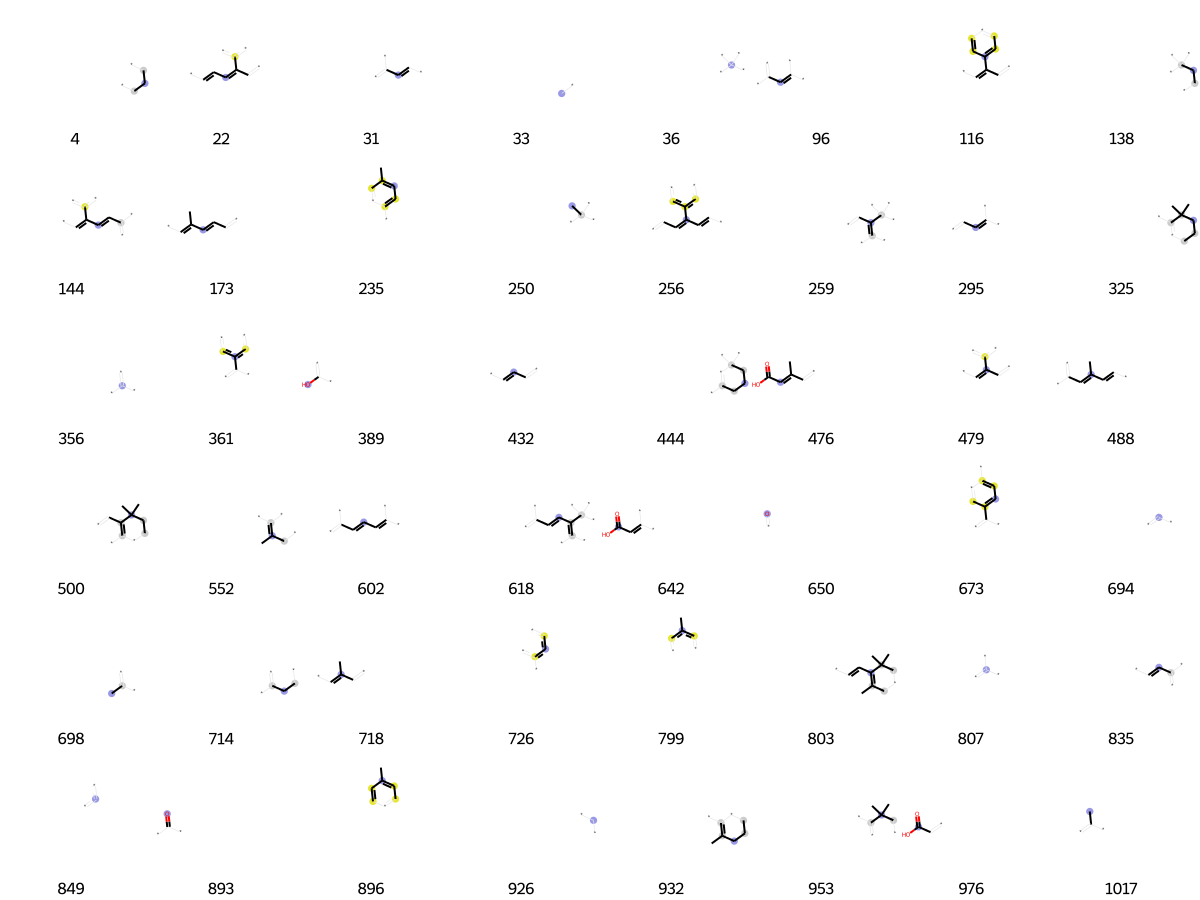

In [946]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [947]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 4,
 8,
 33,
 35,
 36,
 56,
 59,
 80,
 98,
 114,
 118,
 133,
 137,
 138,
 204,
 206,
 231,
 233,
 243,
 250,
 268,
 283,
 284,
 301,
 336,
 342,
 344,
 356,
 395,
 398,
 429,
 444,
 453,
 472,
 478,
 490,
 549,
 590,
 632,
 669,
 678,
 681,
 694,
 714,
 739,
 753,
 784,
 785,
 807,
 860,
 884,
 887,
 890,
 904,
 921,
 926,
 1012,
 1019]

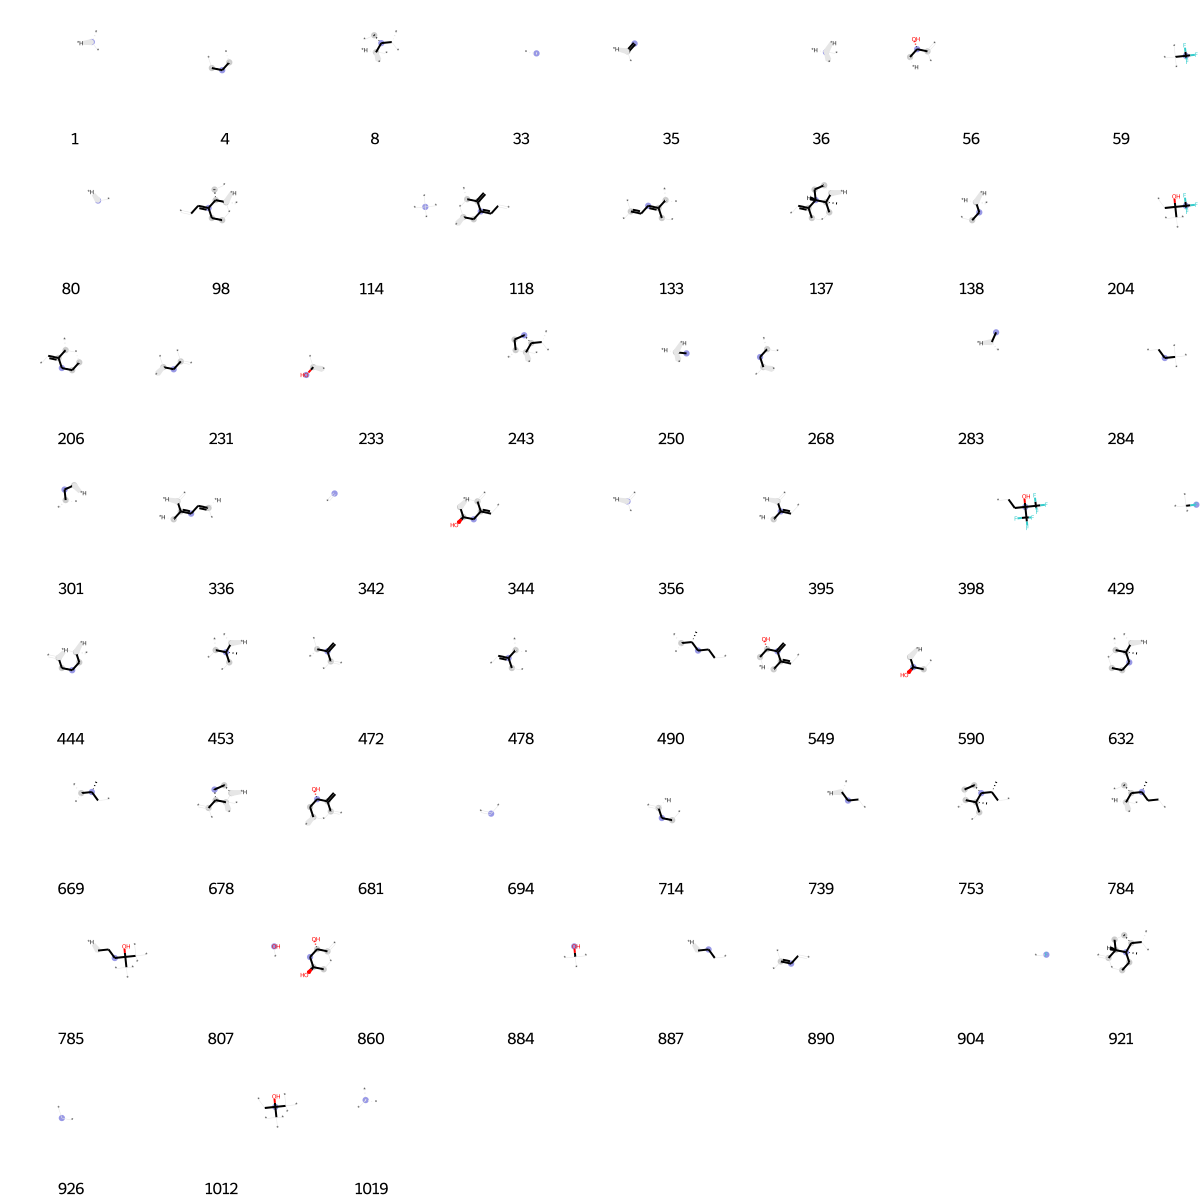

In [948]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [965]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[31,
 33,
 34,
 73,
 80,
 112,
 128,
 139,
 157,
 168,
 191,
 200,
 214,
 216,
 237,
 294,
 305,
 329,
 332,
 333,
 356,
 360,
 361,
 366,
 378,
 381,
 419,
 425,
 428,
 441,
 458,
 464,
 465,
 474,
 491,
 511,
 557,
 561,
 650,
 652,
 659,
 673,
 674,
 694,
 695,
 699,
 726,
 777,
 780,
 790,
 792,
 807,
 816,
 838,
 840,
 843,
 848,
 849,
 875,
 881,
 893,
 894,
 904,
 946,
 961,
 969,
 972,
 974,
 1015]

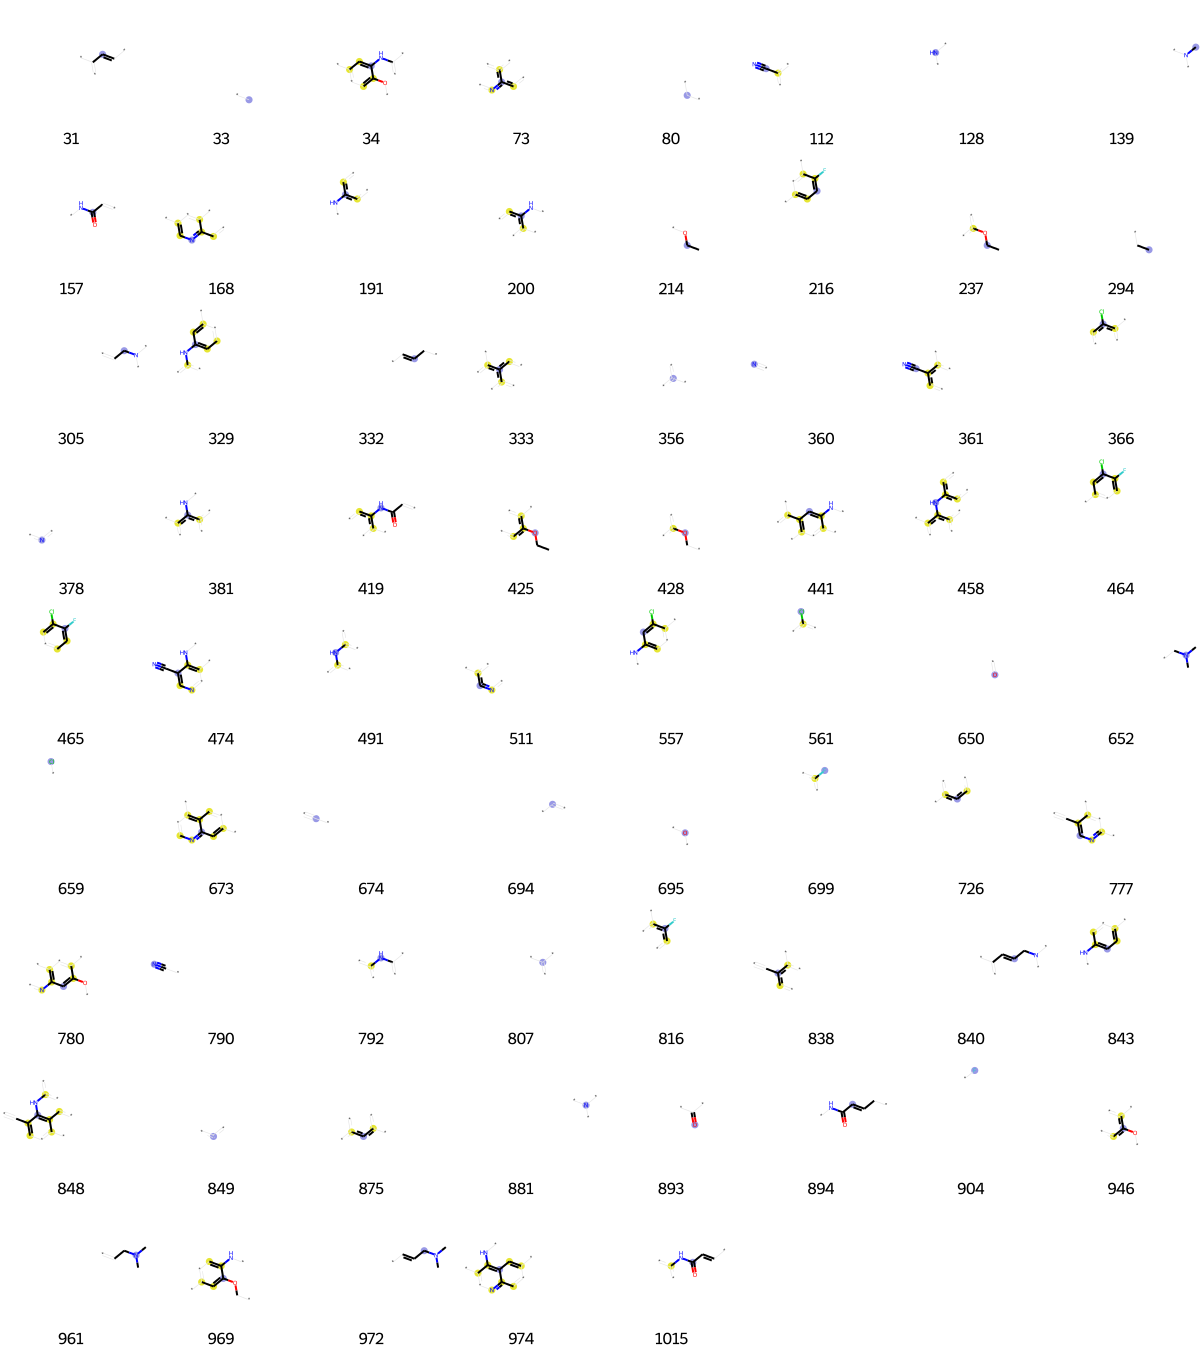

In [966]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [950]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[4,
 33,
 34,
 80,
 94,
 128,
 147,
 173,
 197,
 235,
 249,
 268,
 293,
 294,
 301,
 319,
 343,
 350,
 356,
 398,
 446,
 452,
 456,
 486,
 512,
 528,
 548,
 580,
 583,
 650,
 676,
 690,
 695,
 715,
 726,
 738,
 807,
 833,
 841,
 849,
 875,
 888,
 893,
 926,
 935,
 946,
 967,
 994,
 998,
 1019]

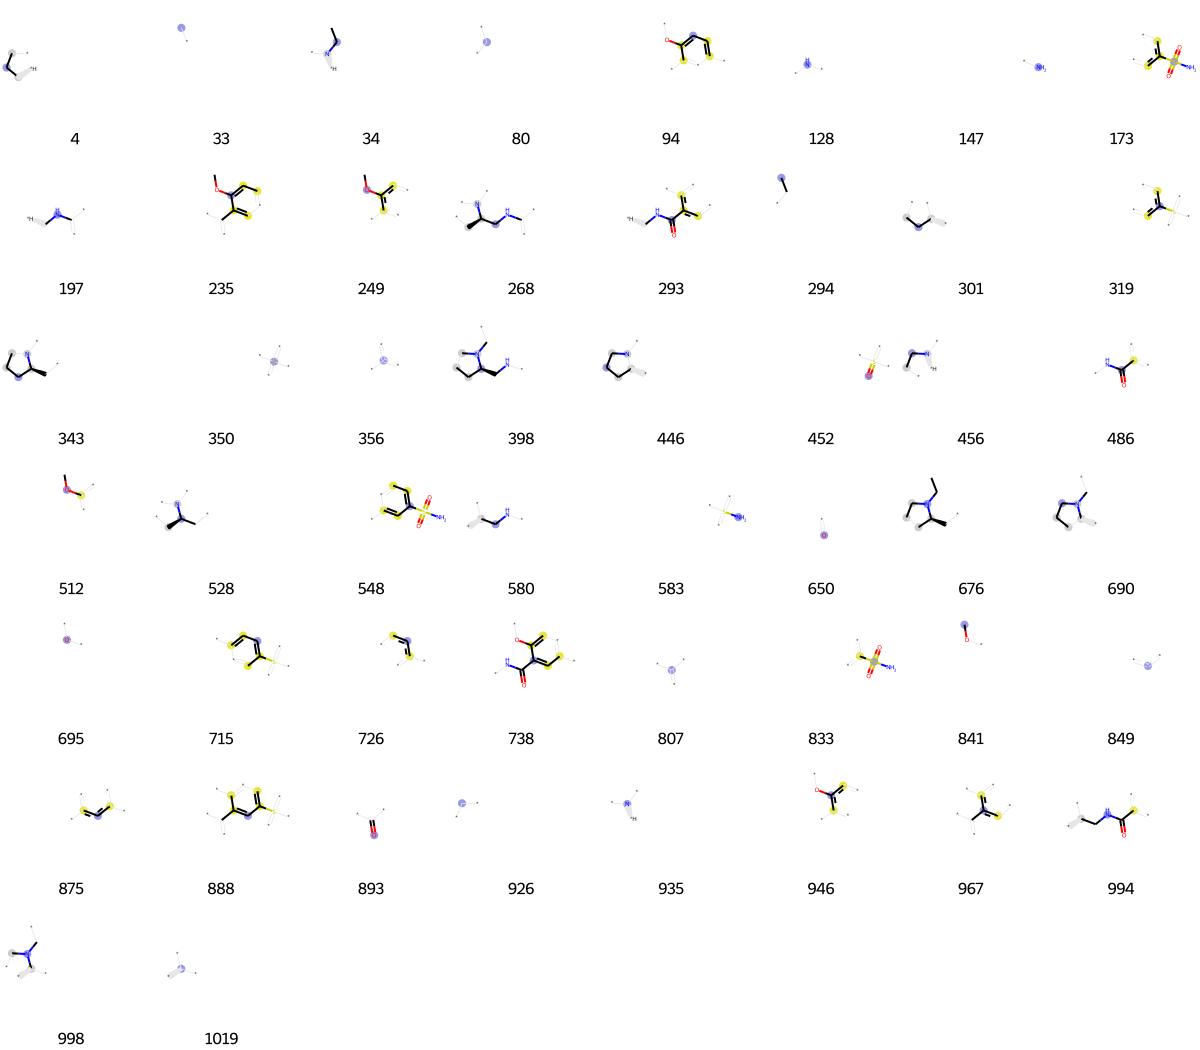

In [951]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [952]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 7,
 33,
 52,
 80,
 89,
 114,
 116,
 128,
 139,
 227,
 239,
 269,
 322,
 338,
 341,
 356,
 392,
 402,
 499,
 510,
 514,
 554,
 603,
 606,
 629,
 632,
 650,
 695,
 705,
 807,
 843,
 849,
 875,
 881,
 893,
 942]

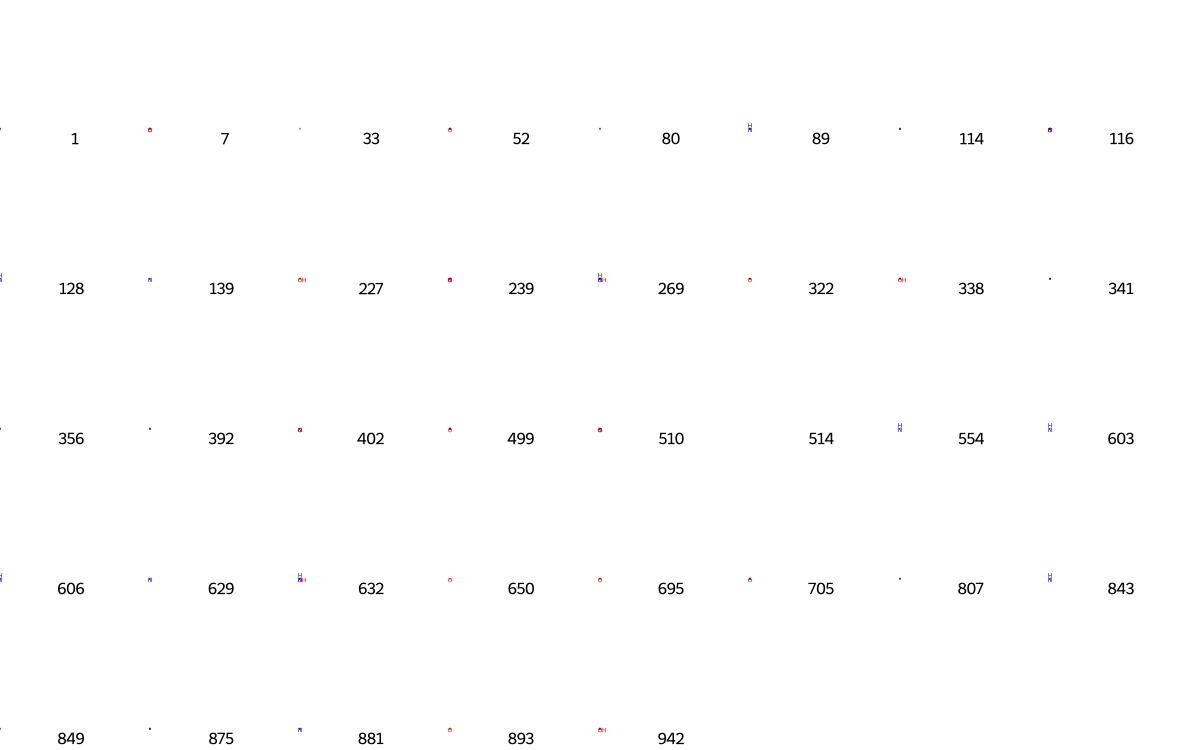

In [953]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [954]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 33,
 57,
 79,
 80,
 87,
 147,
 211,
 389,
 403,
 650,
 739,
 767,
 770,
 777,
 786,
 807,
 820,
 825,
 893,
 932]

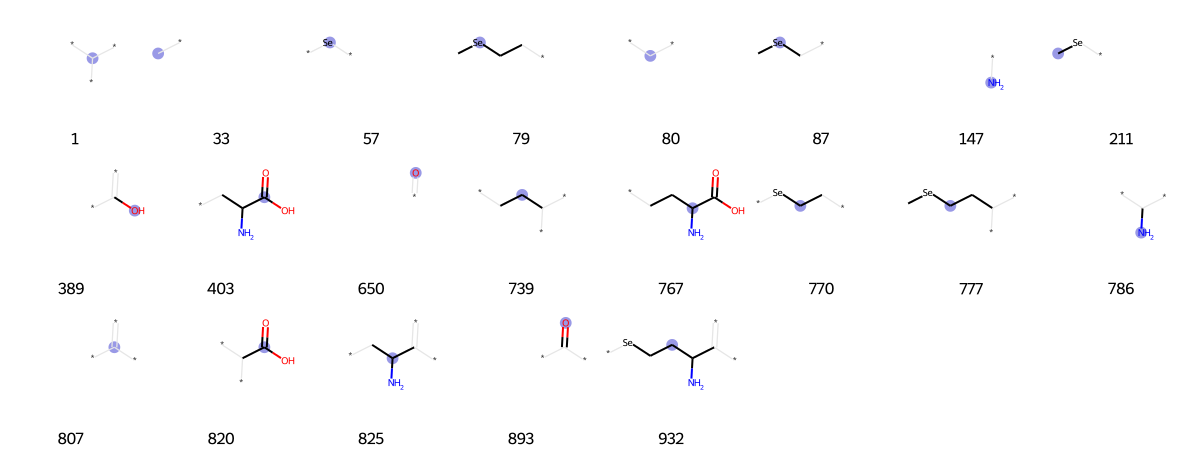

In [955]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [956]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[4,
 33,
 41,
 61,
 65,
 80,
 99,
 114,
 128,
 158,
 163,
 191,
 236,
 252,
 260,
 276,
 280,
 288,
 304,
 310,
 314,
 356,
 361,
 367,
 378,
 381,
 456,
 478,
 552,
 580,
 624,
 650,
 656,
 687,
 698,
 707,
 714,
 792,
 796,
 798,
 807,
 831,
 835,
 893,
 924,
 926,
 935,
 960,
 1020]

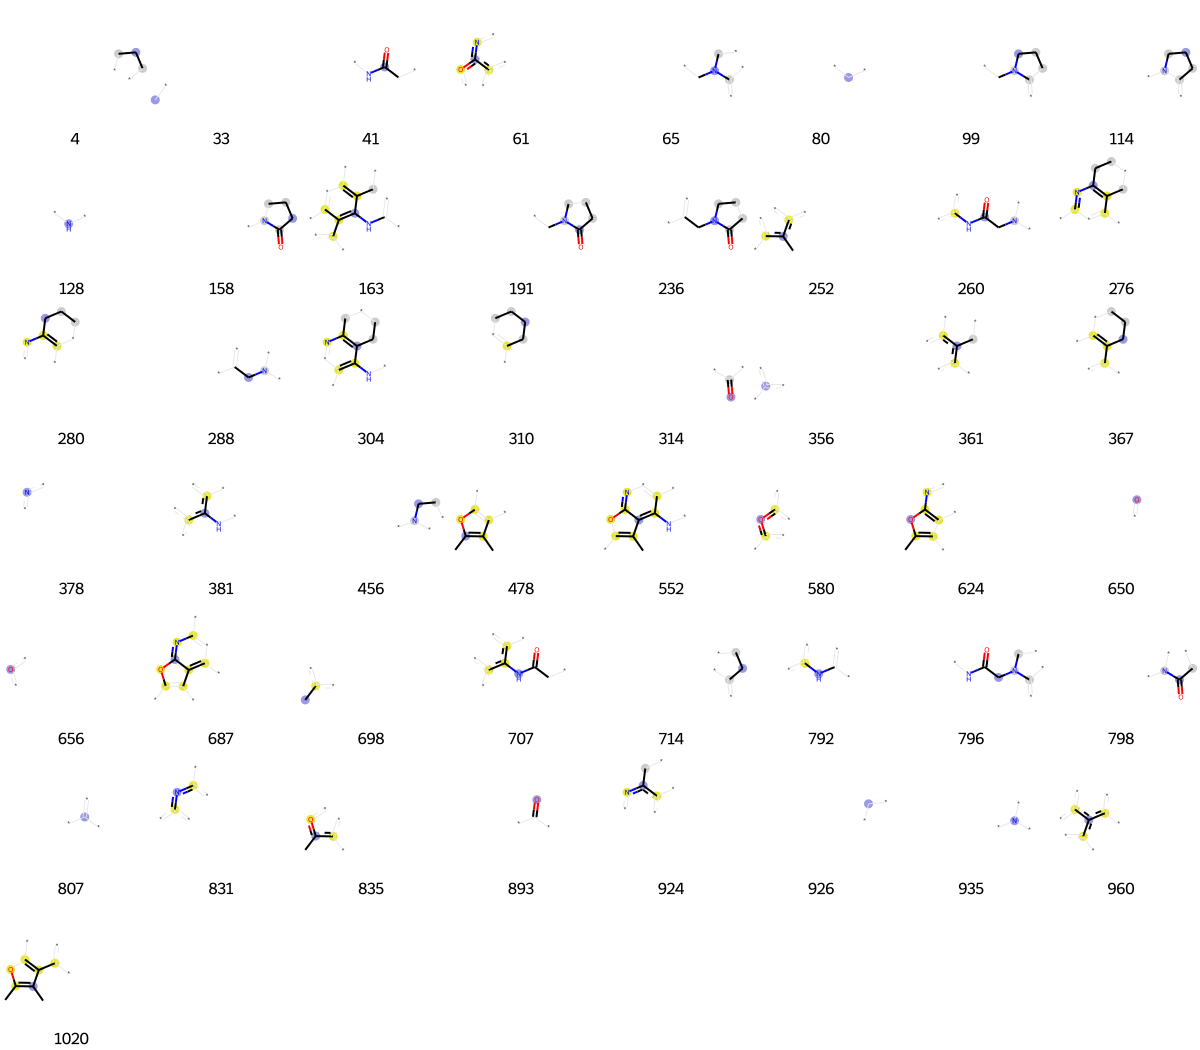

In [957]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [958]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 80,
 90,
 119,
 128,
 197,
 218,
 294,
 314,
 337,
 349,
 356,
 420,
 445,
 464,
 542,
 578,
 591,
 592,
 650,
 667,
 699,
 721,
 745,
 750,
 758,
 772,
 794,
 807,
 816,
 846,
 849,
 852,
 887,
 893,
 904,
 917,
 935]

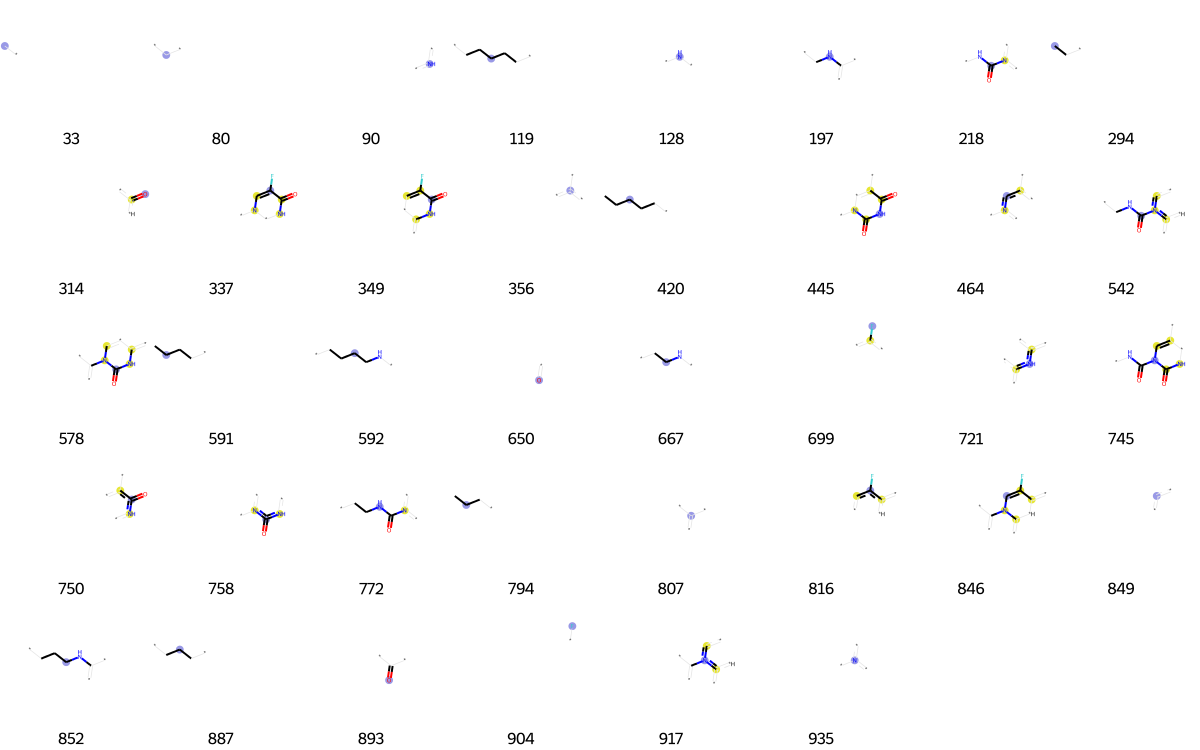

In [959]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [960]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[36,
 41,
 46,
 80,
 112,
 130,
 192,
 233,
 253,
 295,
 356,
 395,
 446,
 463,
 486,
 605,
 610,
 614,
 650,
 656,
 692,
 695,
 755,
 770,
 795,
 807,
 814,
 839,
 863,
 904,
 1019]

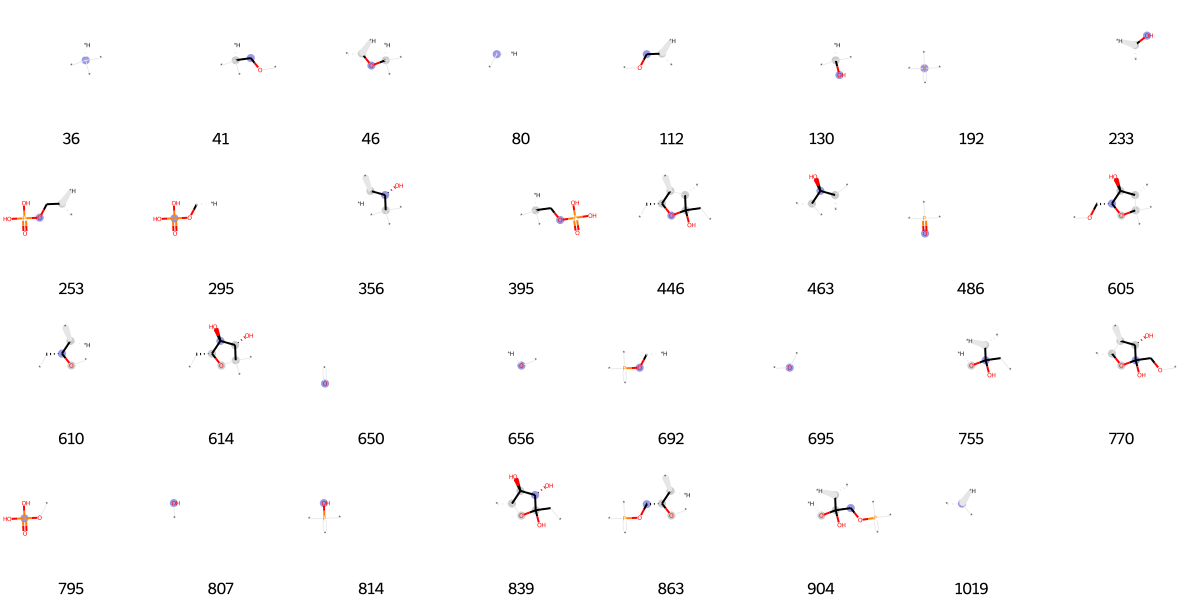

In [961]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [962]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 4,
 33,
 54,
 64,
 90,
 128,
 147,
 175,
 185,
 195,
 301,
 305,
 325,
 341,
 356,
 389,
 436,
 456,
 483,
 514,
 557,
 604,
 650,
 652,
 695,
 717,
 726,
 784,
 807,
 841,
 849,
 888,
 890,
 893,
 926,
 1019]

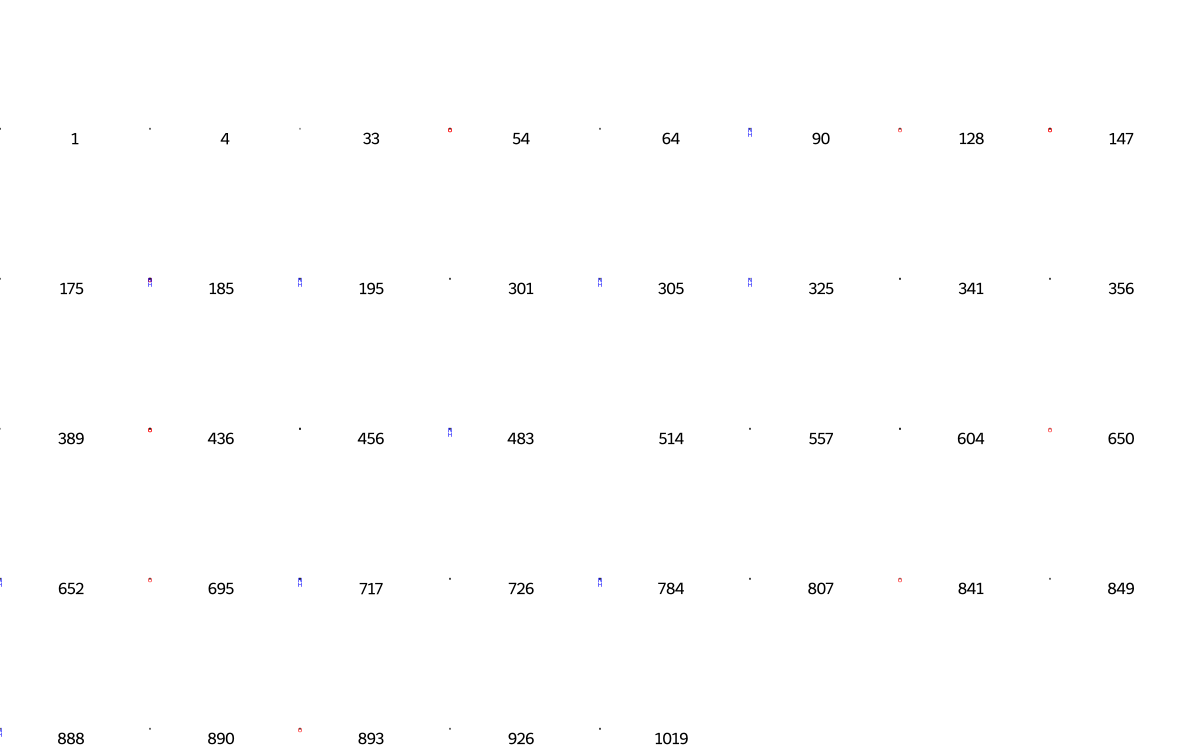

In [963]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])